<h1>Airplane Delays Solution LATAM Test</h1>

<h2>Pre Steps</h2>
<h4>Import libraries</h4>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from utils.pddataframes import (
    print_ocurrencies, plot_barchar, plot_multiple_barchar, get_high_season, get_period_day,
    plot_grouped_barchar, plot_grouped_barchar_withpd, get_ratios
)
from datetime import datetime

<h2> First challenge </h2>
<h4> Import data into Pandas DataFrame </h4>

In [11]:
dataset_scl = pd.read_csv("dataset_SCL.csv")

columns_names = list(dataset_scl)
dataset_scl.head()

C:\Users\Felipe\AppData\Local\Temp/ipykernel_25792/1755922022.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_scl = pd.read_csv("dataset_SCL.csv")


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


<h4>Shape of dataset</h4>

In [12]:
total_rows, total_columns = dataset_scl.shape
print("Total columns: {} \nTotal rows: {}".format(total_columns, total_rows))

Total columns: 18 
Total rows: 68206


<h4>Dataset info</h4>
<p>As we can see, the datasets have a null value in the Vlo-O column and have 18 columns and 68206 rows</p>

In [13]:
dataset_scl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [14]:
#Check row with NaN Vlo-O
dataset_scl[dataset_scl['Vlo-O'].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


<h4>Clean dataset</h4>
<p>The row 6068 have a Not a Number value, as we can't get the missing value, we will drop this row to clean the dataset</p>

In [15]:
clean_dataset_scl = dataset_scl.dropna()
clean_dataset_scl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68205 non-null  object
 1   Vlo-I      68205 non-null  object
 2   Ori-I      68205 non-null  object
 3   Des-I      68205 non-null  object
 4   Emp-I      68205 non-null  object
 5   Fecha-O    68205 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68205 non-null  object
 8   Des-O      68205 non-null  object
 9   Emp-O      68205 non-null  object
 10  DIA        68205 non-null  int64 
 11  MES        68205 non-null  int64 
 12  AÑO        68205 non-null  int64 
 13  DIANOM     68205 non-null  object
 14  TIPOVUELO  68205 non-null  object
 15  OPERA      68205 non-null  object
 16  SIGLAORI   68205 non-null  object
 17  SIGLADES   68205 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.9+ MB


In [16]:
#Get all differents ocurrencies for all columns
print_ocurrencies(dataset_scl, columns_names)

Ocurrencies for Fecha-I column
2017-07-28 13:30:00    6
2017-03-26 18:00:00    6
2017-03-19 18:00:00    6
2017-11-14 09:30:00    5
2017-08-01 05:00:00    5
                      ..
2017-06-02 15:16:00    1
2017-06-03 15:16:00    1
2017-06-04 15:16:00    1
2017-06-05 15:16:00    1
2017-12-31 14:55:00    1
Name: Fecha-I, Length: 53252, dtype: int64


Ocurrencies for Vlo-I column
174     686
11      645
116     608
150     557
162     553
       ... 
1158      1
368       1
9955      1
9701      1
1218      1
Name: Vlo-I, Length: 750, dtype: int64


Ocurrencies for Ori-I column
SCEL    68206
Name: Ori-I, dtype: int64


Ocurrencies for Des-I column
SCFA    5787
SPJC    5270
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SBFI       1
SPSO       1
SEQU       1
SEQM       1
SARI       1
Name: Des-I, Length: 64, dtype: int64


Ocurrencies for Emp-I column
LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1574
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA  

<p>Some columns are redundant, for example, SIGLAORI, Ori-I and Ori-O have the same value in all dataset, as we show in the cell above</p>

In [17]:
print_ocurrencies(dataset_scl, ['SIGLAORI', 'Ori-I', 'Ori-O'])

Ocurrencies for SIGLAORI column
Santiago    68206
Name: SIGLAORI, dtype: int64


Ocurrencies for Ori-I column
SCEL    68206
Name: Ori-I, dtype: int64


Ocurrencies for Ori-O column
SCEL    68206
Name: Ori-O, dtype: int64




<p>In the case of AÑO, we have only 2 row with AÑO equal 2018 in a dataset with 68205, then, in the practice, could be dropped too</p>

In [18]:
print("Ocurrencies for AÑO column")
clean_dataset_scl['AÑO'].value_counts()

Ocurrencies for AÑO column


2017    68203
2018        2
Name: AÑO, dtype: int64

In [19]:
#Check the Flights with AÑO 2018
clean_dataset_scl[clean_dataset_scl['AÑO']==2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


<h4>Drop useless columns</h4>

In [20]:
final_dataset_scl = clean_dataset_scl.drop(['AÑO', 'Ori-I', 'Ori-O', 'SIGLAORI'], axis = 1)
final_dataset_scl.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,Domingo,I,American Airlines,Miami
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,Lunes,I,American Airlines,Miami
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,Martes,I,American Airlines,Miami
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,Miercoles,I,American Airlines,Miami
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,Jueves,I,American Airlines,Miami


<h4>Check distribution in histogram for time of the day</h4>

(array([1155., 1684.,  665.,  546., 1184., 2616., 3860., 4570., 4341.,
        3488., 2564., 3551., 3440., 3504., 3866., 3834., 3248., 3491.,
        3873., 3724., 3034., 2364., 2249., 1354.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

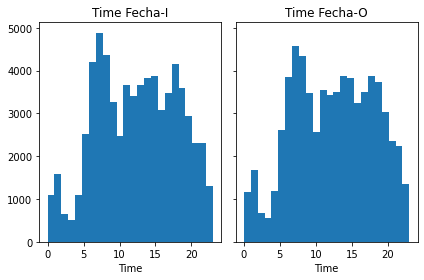

In [22]:

fecha_i = list(map(lambda dt: datetime.strptime(dt,'%Y-%m-%d %H:%M:%S'), final_dataset_scl['Fecha-I'].to_numpy()))
fecha_o = list(map(lambda dt: datetime.strptime(dt,'%Y-%m-%d %H:%M:%S'), final_dataset_scl['Fecha-O'].to_numpy()))
hour_list_i = [t.hour for t in fecha_i]
hour_list_o = [t.hour for t in fecha_o]
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].set_xlabel('Time')
axs[1].set_xlabel('Time')
axs[0].set_title('Time Fecha-I')
axs[1].set_title('Time Fecha-O')
axs[0].hist(hour_list_i, bins=24)
axs[1].hist(hour_list_o, bins=24)



<h4>Check distribution in histogram for date</h4>

array([[<Axes: title={'center': 'DIA'}>, <Axes: title={'center': 'MES'}>]],
      dtype=object)

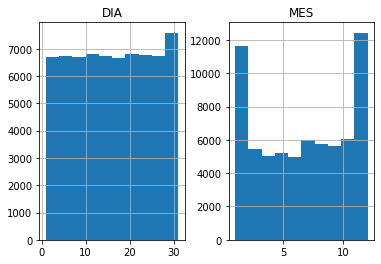

In [23]:
final_dataset_scl.hist()


<h4>Check distribution in barchar for DIANOM</h4>

{'Viernes': 10292, 'Jueves': 10250, 'Lunes': 10131, 'Domingo': 9796, 'Miercoles': 9722, 'Martes': 9662, 'Sabado': 8352}


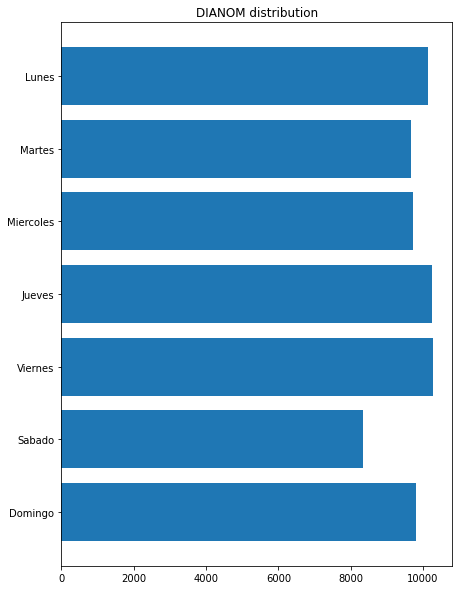

In [24]:
dianom_dict = final_dataset_scl['DIANOM'].value_counts().to_dict()
print(dianom_dict)
#Get ordered list from DIANOM to create a barchar with ordered days of the week
ordered_dianom_dict =  dict(map(lambda day: (day, dianom_dict[day]), 
                                ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
                               )
                           )
plot_barchar(ordered_dianom_dict, 'DIANOM')

<p>With both histograms, we can see the hours with more flight</p>

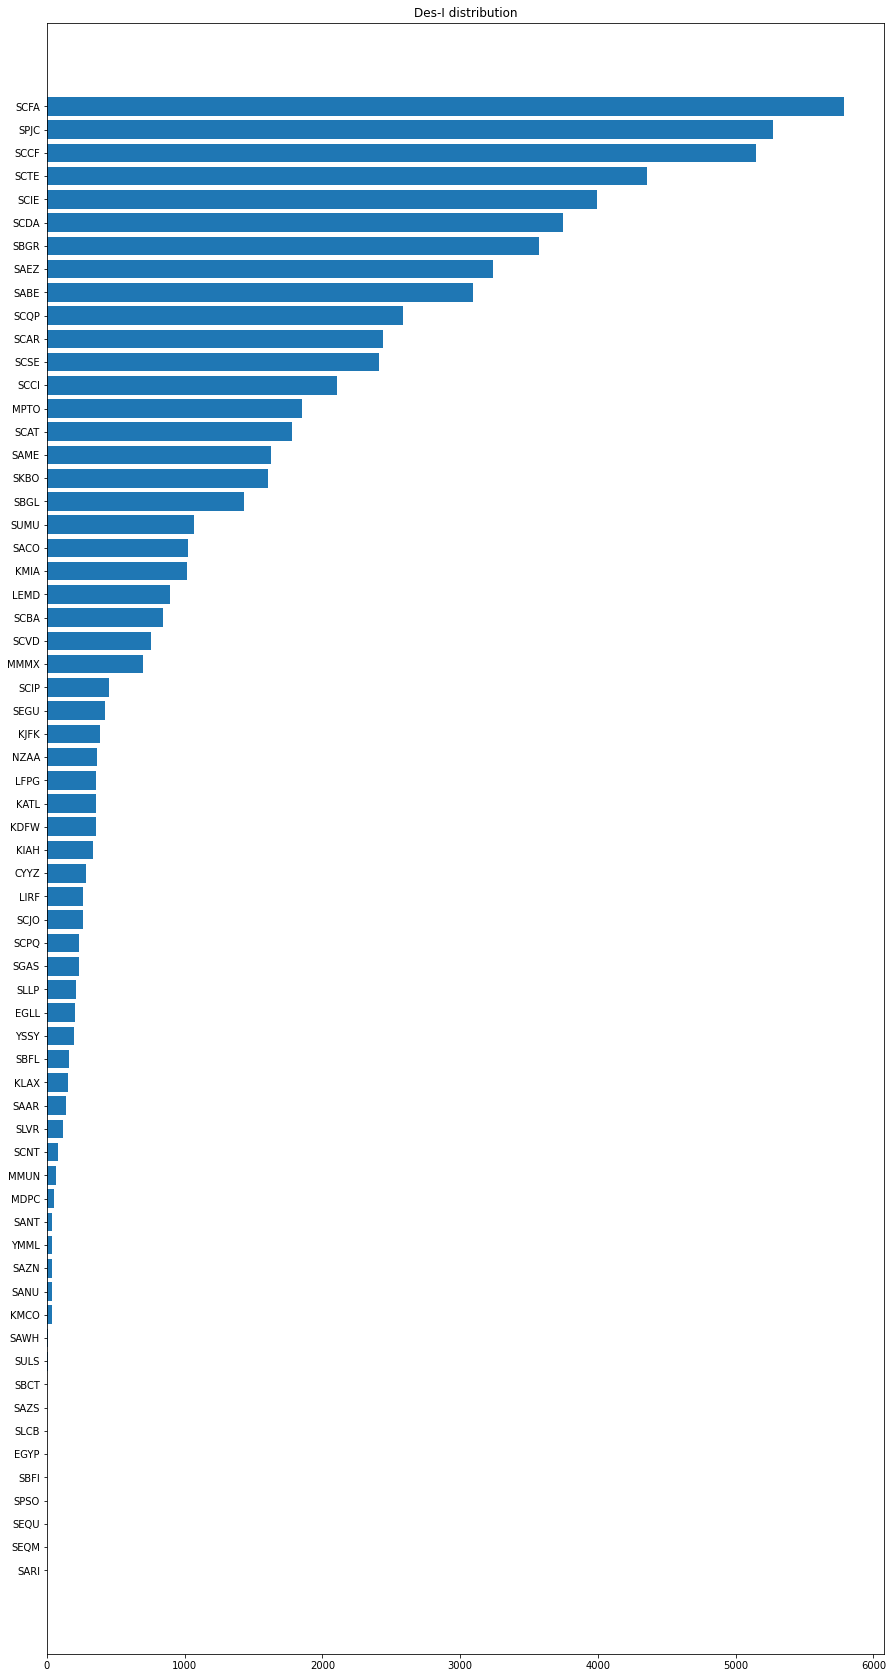

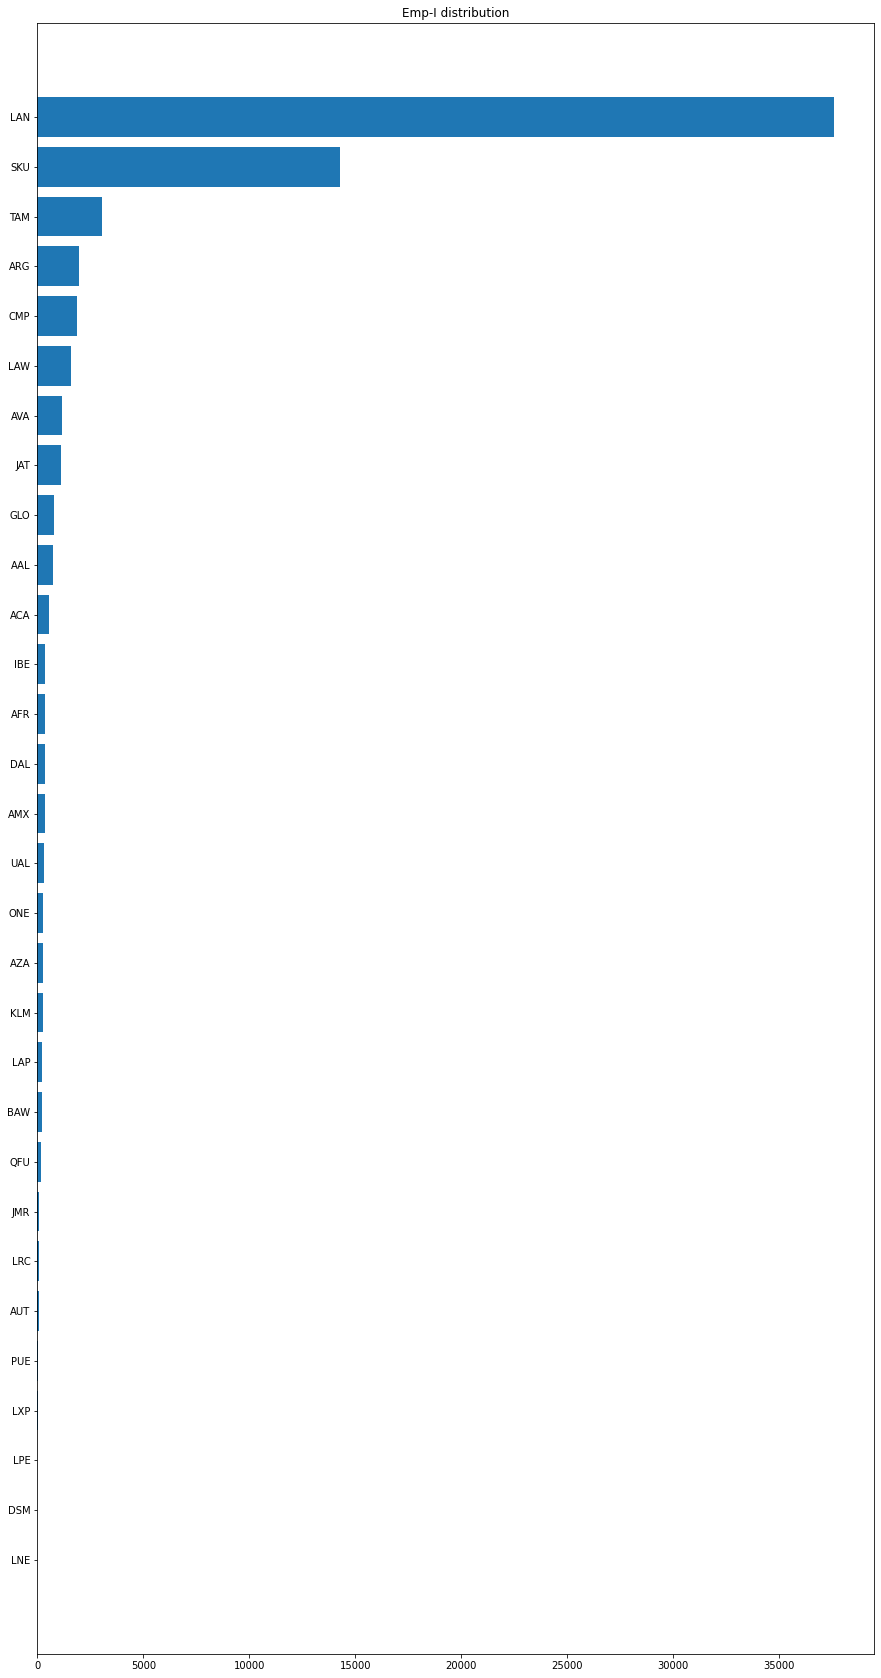

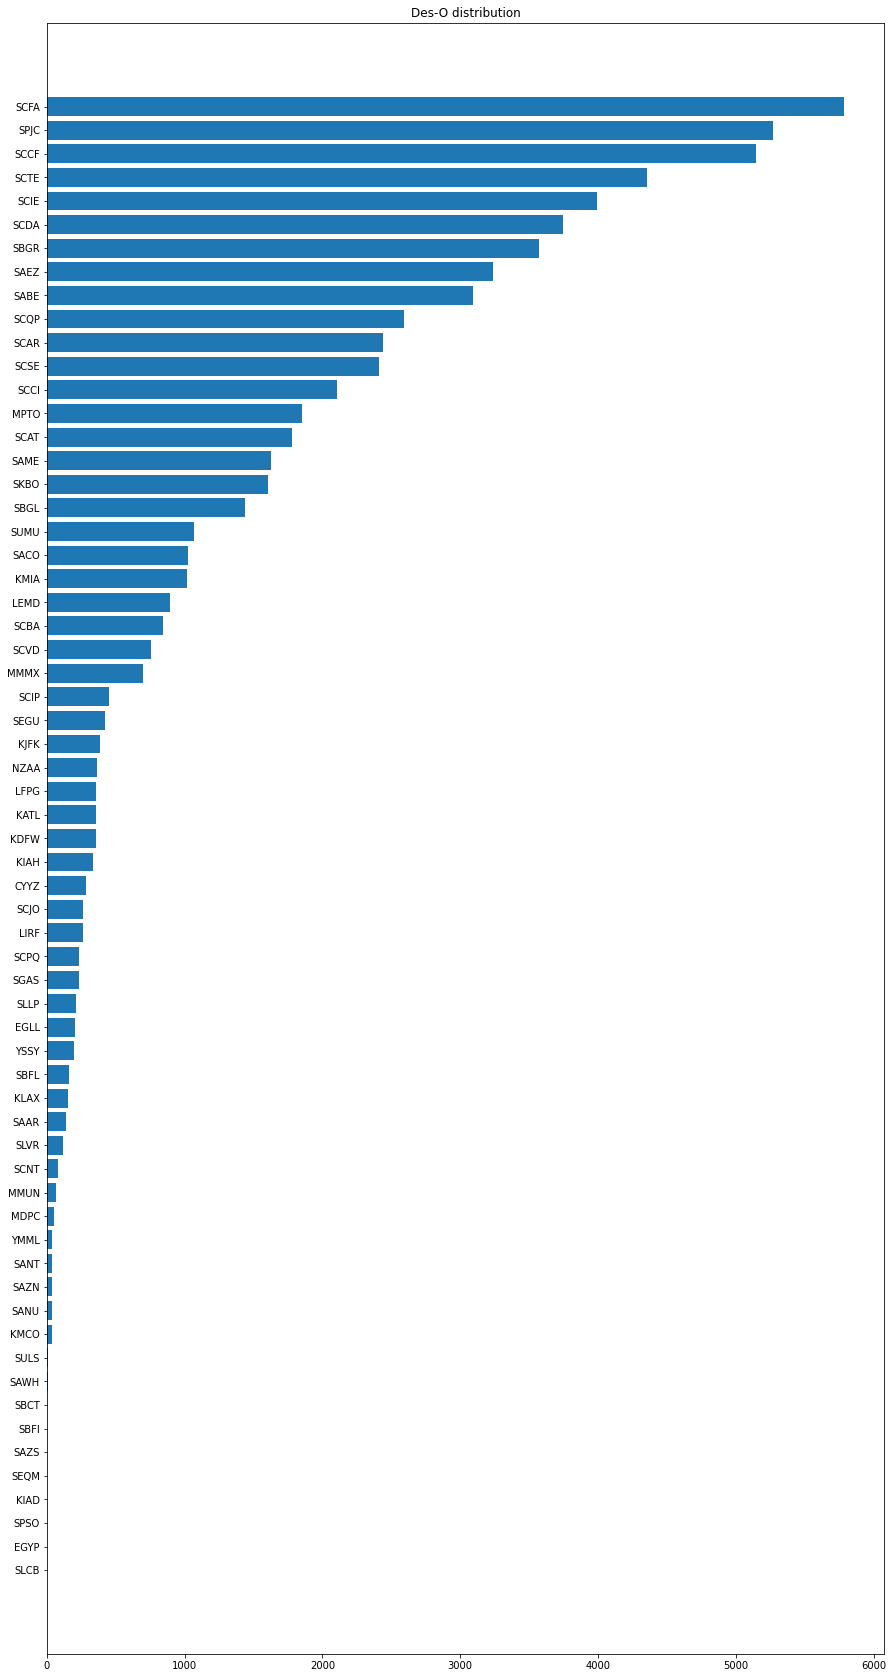

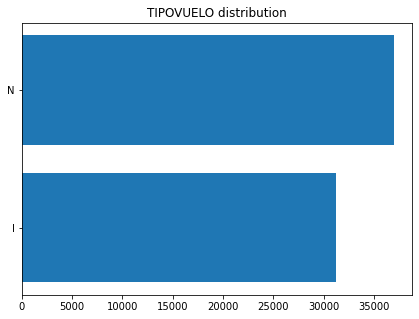

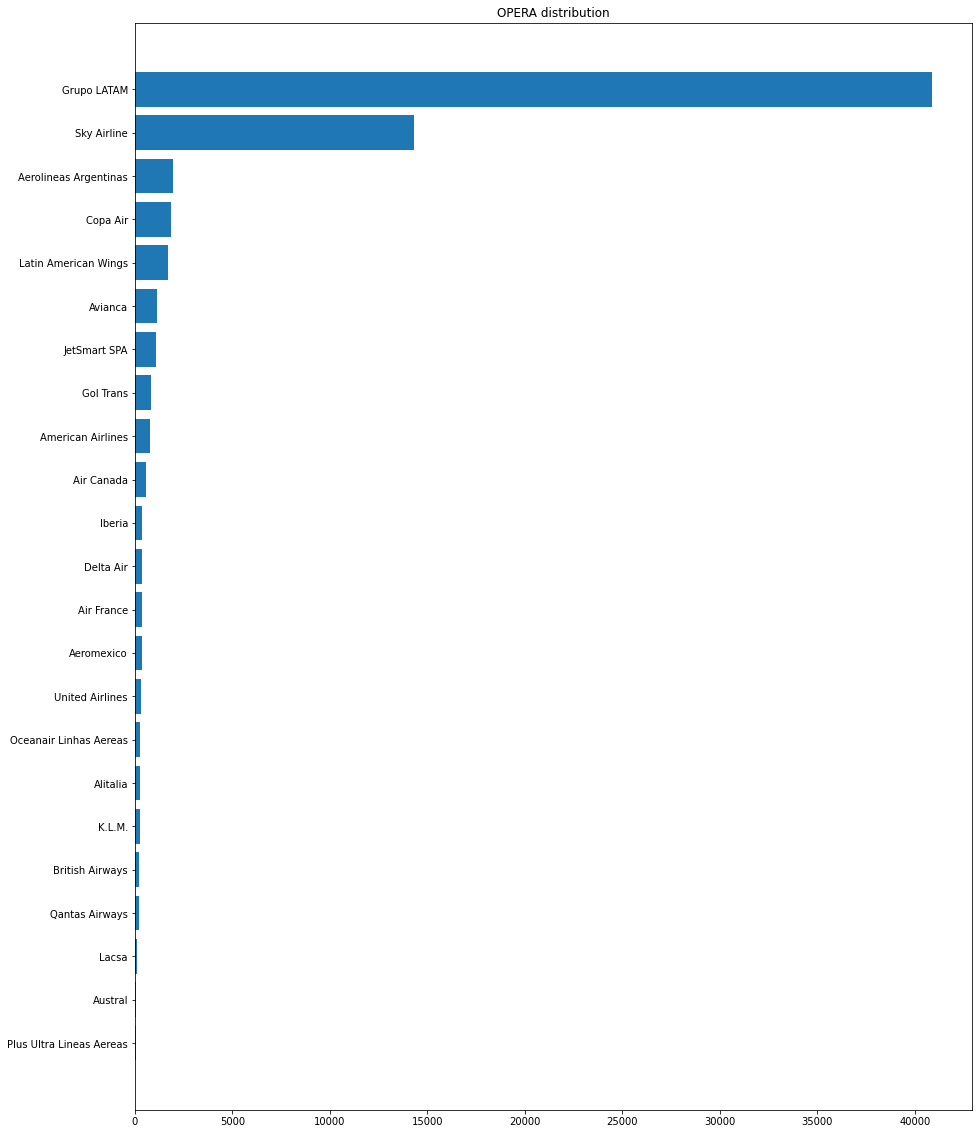

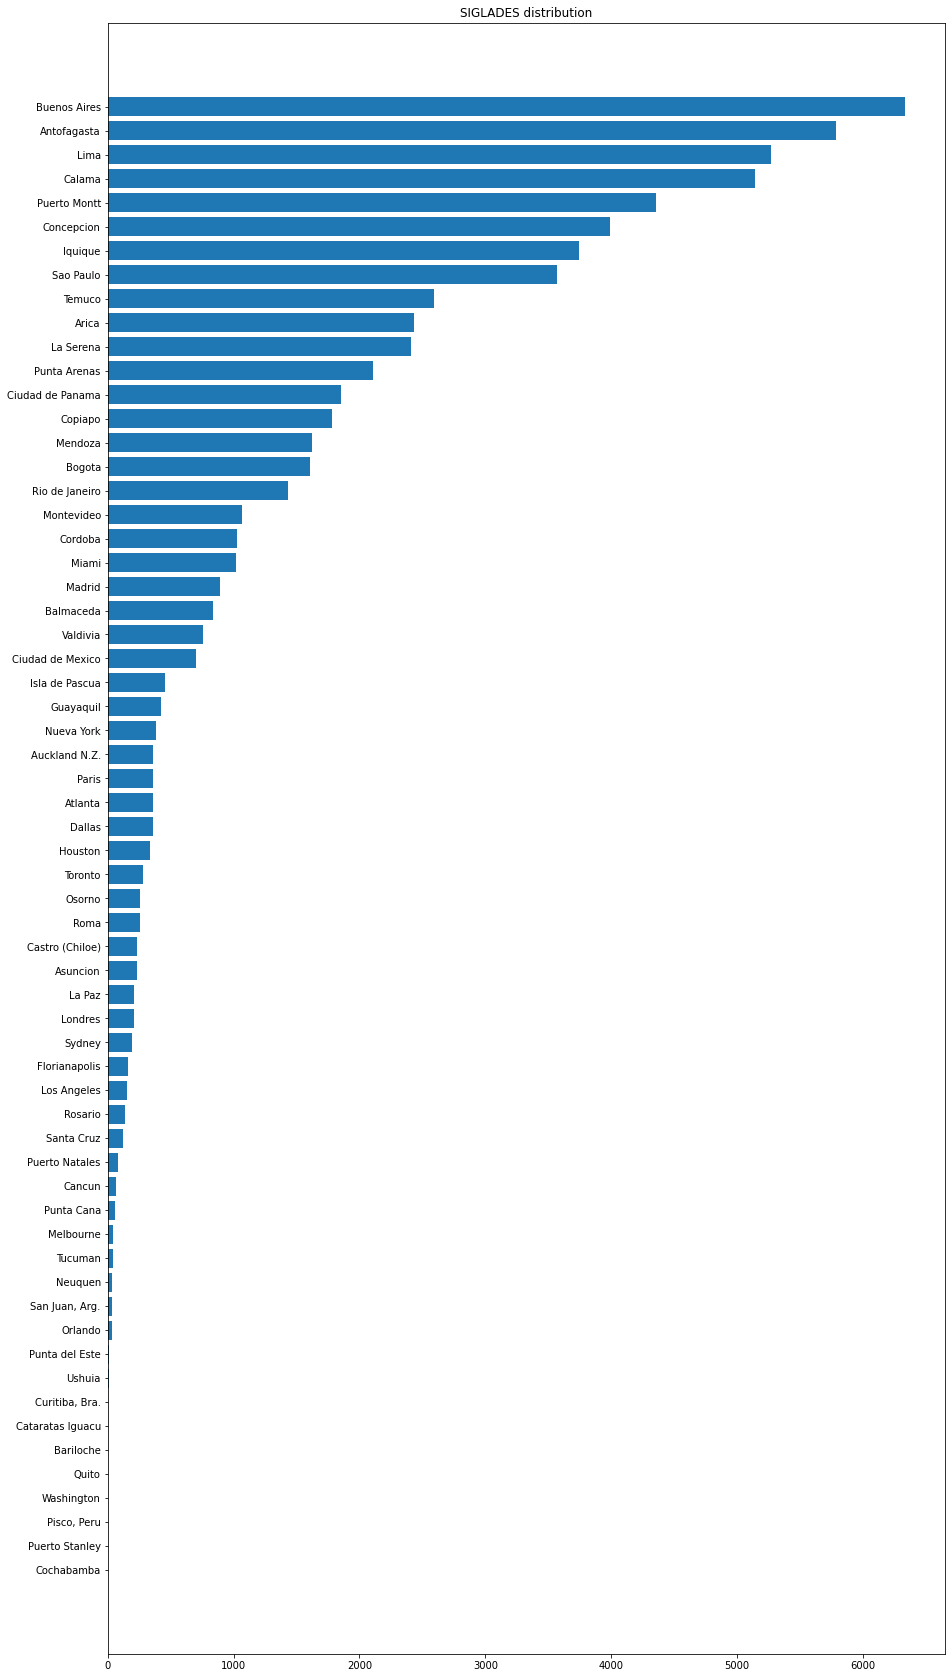

In [25]:
categorical_columns = ['Des-I', 'Emp-I', 'Des-O', 'TIPOVUELO', 'OPERA', 'SIGLADES']
plot_multiple_barchar(final_dataset_scl, categorical_columns)


<h4>Summary</h4>
<ul>
    <li>
        As we can see, in the notebook with the charts, tables and distributions we can remove at least 4 columns in a first step.
    </li>
    <li>
        The data require to be cleaned before to process, it and corroborates that the most important step in a data analysis process, is the data exploration.
    </li>    
    <li>
        The most flight departure from Santiago and arrivals to Buenos Aires, Antofagasta and Lima.
    </li>
    <li>
        Grupo LATAM was the most important airline in Santiago de Chile during 2017 year.
    </li>
    
</ul>

<h2> Second challenge </h2>
<h4> Create new columns </h4>

In [16]:
synthetic_features = final_dataset_scl.assign(high_season=lambda df: get_high_season(df['Fecha-I']))
synthetic_features = synthetic_features.assign(
    min_diff=lambda df: (
        pd.to_datetime(
            df['Fecha-O'], format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
    ).dt.total_seconds() / 60
)
synthetic_features = synthetic_features.assign(delay_15=lambda df: (df['min_diff'] > 15).astype(int))
synthetic_features = synthetic_features.assign(period_day=lambda df: get_period_day(df['Fecha-I']))

synthetic_features.head()

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,delay_15,period_day
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,Domingo,I,American Airlines,Miami,1,3.0,0,night
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,Lunes,I,American Airlines,Miami,1,9.0,0,night
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,Martes,I,American Airlines,Miami,1,9.0,0,night
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,Miercoles,I,American Airlines,Miami,1,3.0,0,night
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,Jueves,I,American Airlines,Miami,1,-2.0,0,night


In [17]:
synthetic_features[synthetic_features['period_day']=='morning']

,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,delay_15,period_day
201,2017-01-01 10:35:00,1281,SABE,ARG,2017-01-01 10:25:00,1281,SABE,ARG,1,1,Domingo,I,Aerolineas Argentinas,Buenos Aires,1,-10.0,0,morning
202,2017-01-02 10:35:00,1281,SABE,ARG,2017-01-02 10:37:00,1281,SABE,ARG,2,1,Lunes,I,Aerolineas Argentinas,Buenos Aires,1,2.0,0,morning
203,2017-01-03 10:35:00,1281,SABE,ARG,2017-01-03 10:33:00,1281,SABE,ARG,3,1,Martes,I,Aerolineas Argentinas,Buenos Aires,1,-2.0,0,morning
204,2017-01-04 10:35:00,1281,SABE,ARG,2017-01-04 11:06:00,1281,SABE,ARG,4,1,Miercoles,I,Aerolineas Argentinas,Buenos Aires,1,31.0,1,morning
205,2017-01-05 10:35:00,1281,SABE,ARG,2017-01-05 10:53:00,1281,SABE,ARG,5,1,Jueves,I,Aerolineas Argentinas,Buenos Aires,1,18.0,1,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68168,2017-12-15 08:55:00,281,SCQP,JAT,2017-12-15 08:56:00,281.0,SCQP,JAT,15,12,Viernes,N,JetSmart SPA,Temuco,1,1.0,0,morning
68171,2017-12-20 11:57:00,281,SCQP,JAT,2017-12-20 12:02:00,281.0,SCQP,JAT,20,12,Miercoles,N,JetSmart SPA,Temuco,1,5.0,0,morning
68173,2017-12-22 08:55:00,281,SCQP,JAT,2017-12-22 09:01:00,281.0,SCQP,JAT,22,12,Viernes,N,JetSmart SPA,Temuco,1,6.0,0,morning
68177,2017-12-27 11:57:00,281,SCQP,JAT,2017-12-27 11:58:00,281.0,SCQP,JAT,27,12,Miercoles,N,JetSmart SPA,Temuco,1,1.0,0,morning


In [18]:
synthetic_features.to_csv('synthetic_features.csv', index=False)

<h2>Third challenge</h2>

In [28]:

synthetic_features_csv = pd.read_csv("synthetic_features.csv")

columns_names = list(synthetic_features_csv)
synthetic_features_csv.head()


C:\Users\Felipe\AppData\Local\Temp/ipykernel_25792/2496093266.py:1: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  synthetic_features_csv = pd.read_csv("synthetic_features.csv")


,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,delay_15,period_day
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,Domingo,I,American Airlines,Miami,1,3.0,0,night
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,Lunes,I,American Airlines,Miami,1,9.0,0,night
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,Martes,I,American Airlines,Miami,1,9.0,0,night
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,Miercoles,I,American Airlines,Miami,1,3.0,0,night
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,Jueves,I,American Airlines,Miami,1,-2.0,0,night


<h4>Chart to compare both classes in required fields</h4>

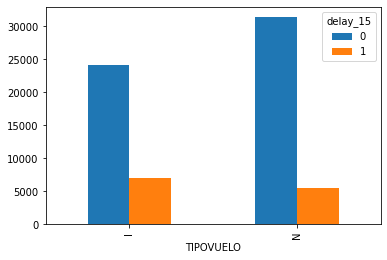

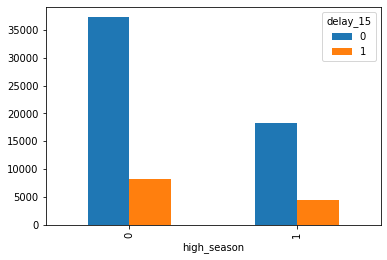

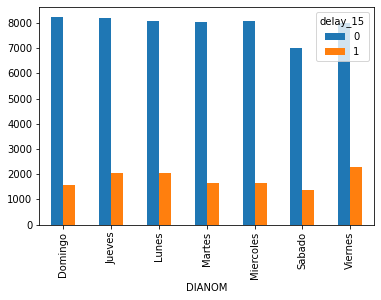

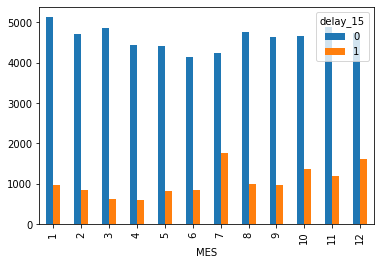

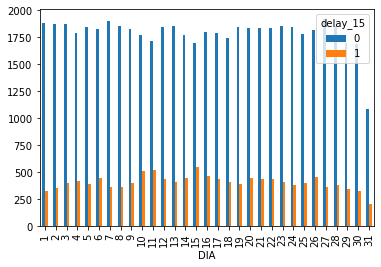

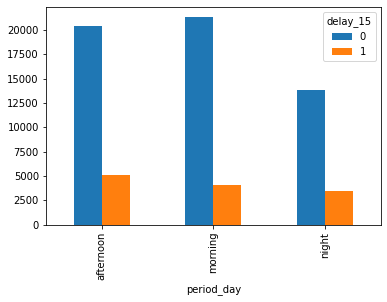

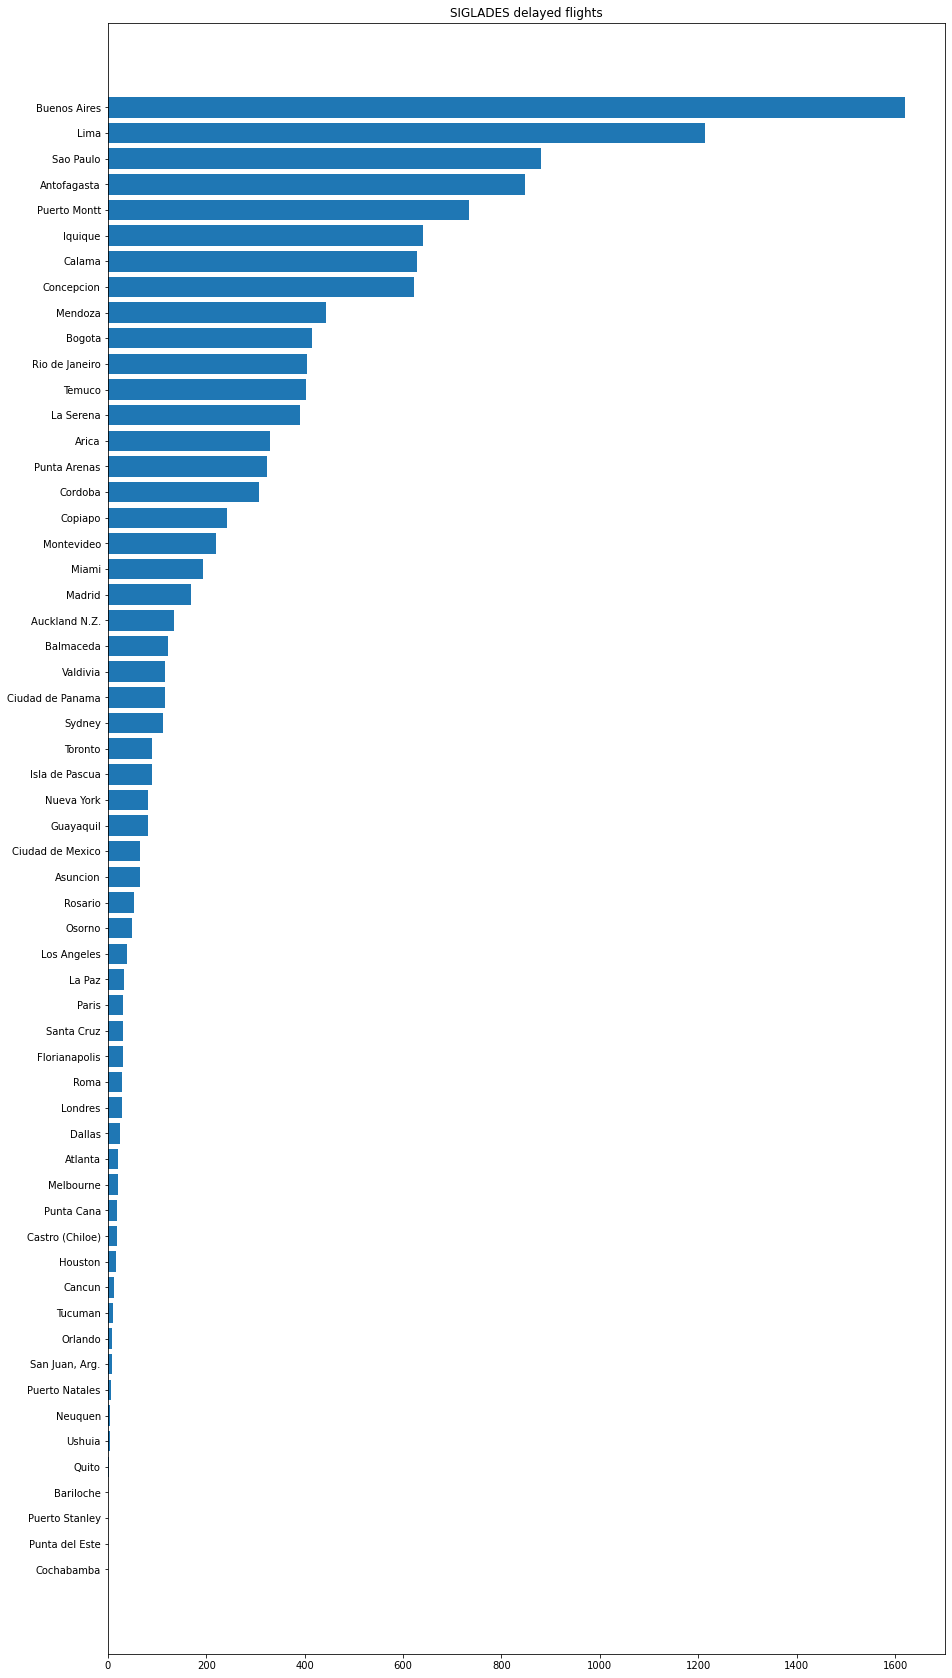

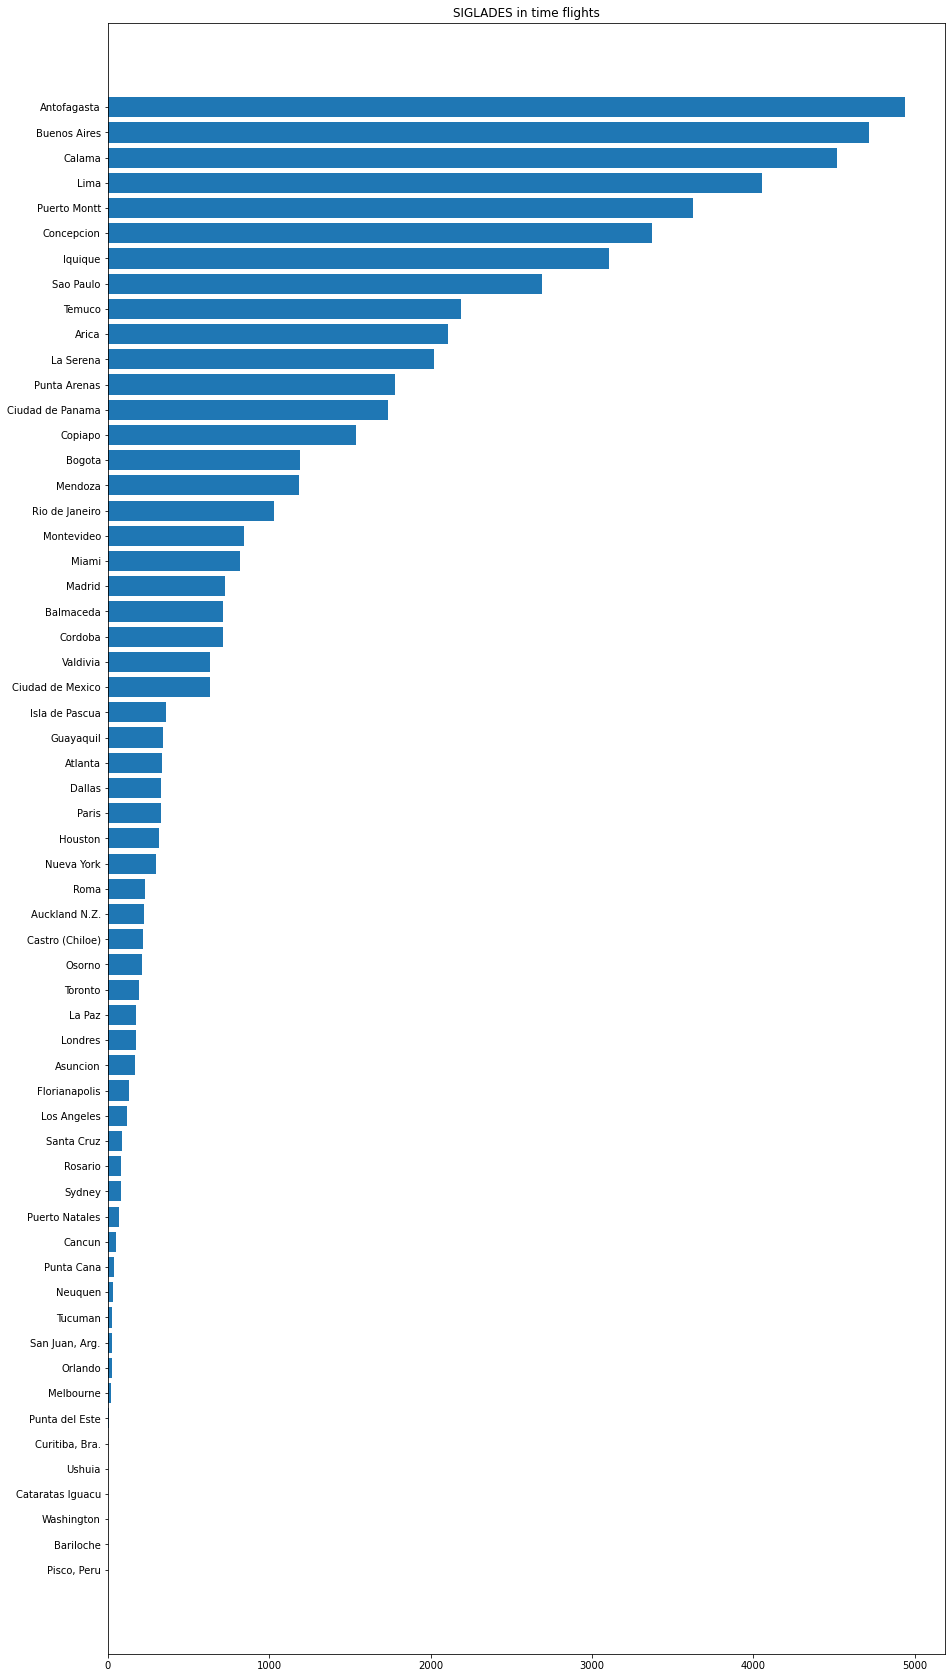

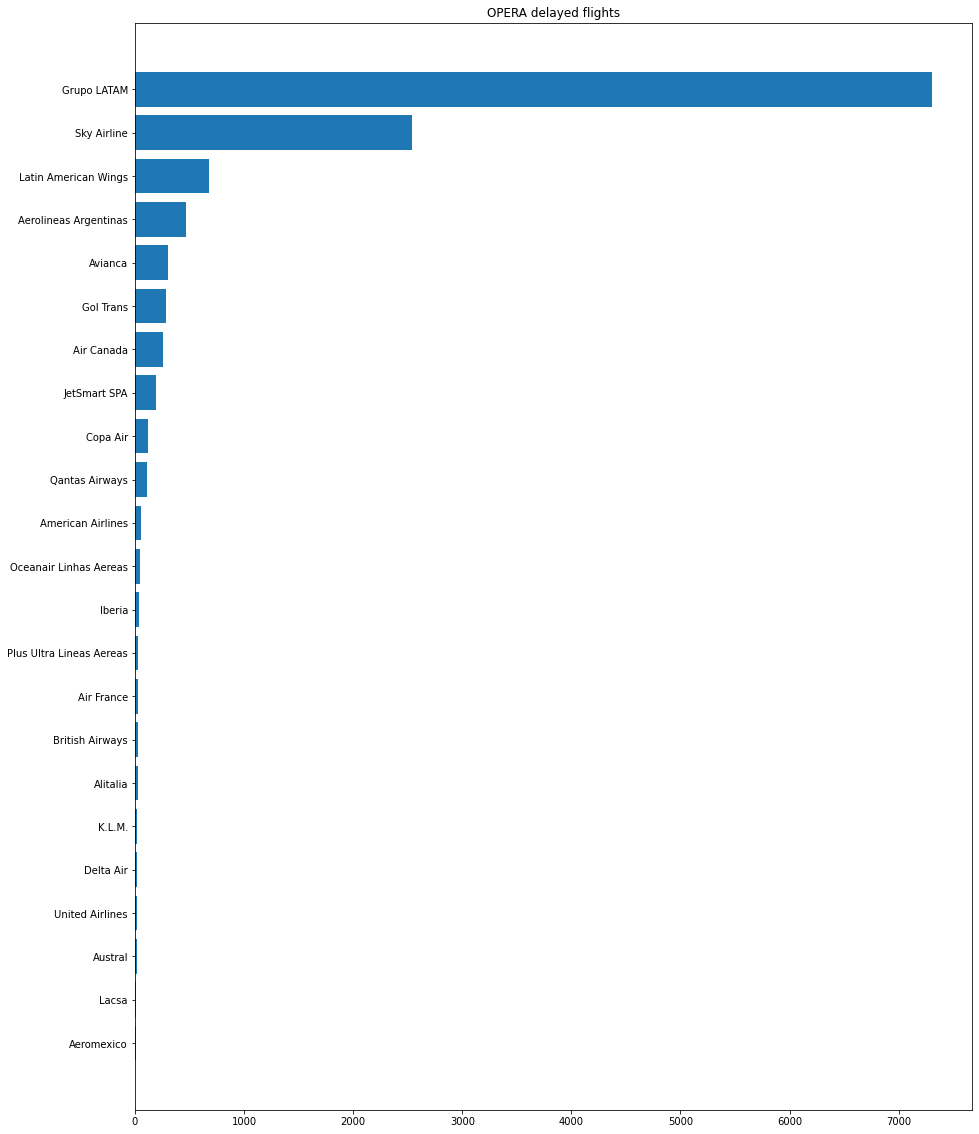

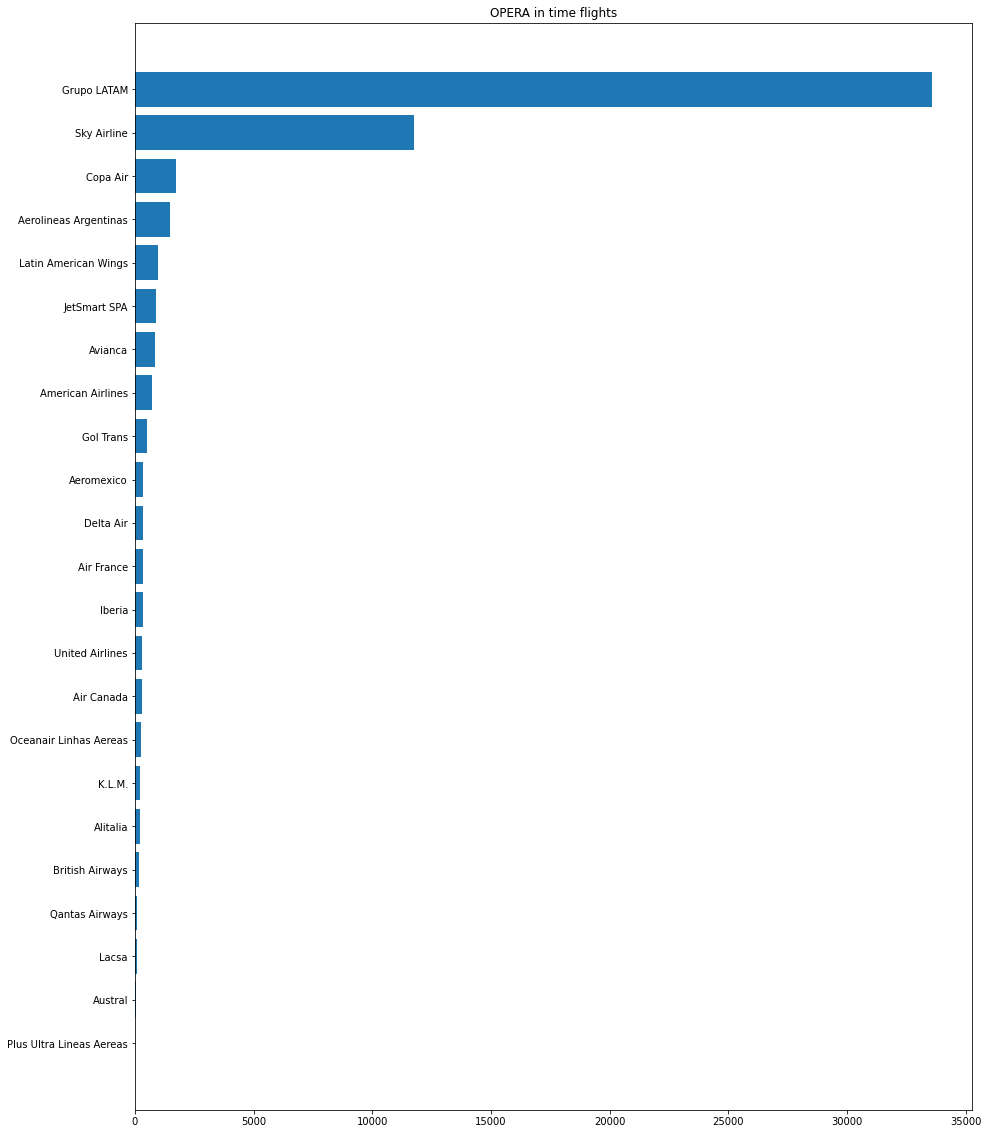

In [29]:
#Plot barchart for diferents columns comparing if flight was delayed

delayed_flights = synthetic_features_csv[synthetic_features_csv['delay_15']==1]
in_time_flights = synthetic_features_csv[synthetic_features_csv['delay_15']==0]
#plot_grouped_barchar(delayed_flights, in_time_flights, ['TIPOVUELO', 'high_season', 'DIANOM', 'MES'])
plot_grouped_barchar_withpd(synthetic_features_csv, ['TIPOVUELO', 'delay_15'])
plot_grouped_barchar_withpd(synthetic_features_csv, ['high_season', 'delay_15'])
plot_grouped_barchar_withpd(synthetic_features_csv, ['DIANOM', 'delay_15'])
plot_grouped_barchar_withpd(synthetic_features_csv, ['MES', 'delay_15'])
plot_grouped_barchar_withpd(synthetic_features_csv, ['DIA', 'delay_15'])
plot_grouped_barchar_withpd(synthetic_features_csv, ['period_day', 'delay_15'])

plot_multiple_barchar(delayed_flights, ['SIGLADES'], "{} delayed flights")
plot_multiple_barchar(in_time_flights, ['SIGLADES'], "{} in time flights")
plot_multiple_barchar(delayed_flights, ['OPERA'], "{} delayed flights")
plot_multiple_barchar(in_time_flights, ['OPERA'], "{} in time flights")



In [21]:
ratios = get_ratios(delayed_flights, in_time_flights, ['TIPOVUELO', 'high_season', 'DIANOM', 'MES', 'DIA', 'SIGLADES', 'OPERA'])
print(ratios)

{'TIPOVUELO': {'I': 0.22561541662665258, 'N': 0.15057079478439647}, 'high_season': {0: 0.17920957662177625, 1: 0.19638855937788322}, 'DIANOM': {'Viernes': 0.22201710066070734, 'Lunes': 0.20215181127233245, 'Jueves': 0.19951219512195123, 'Miercoles': 0.17084961941987245, 'Martes': 0.16911612502587456, 'Domingo': 0.1610861576153532, 'Sabado': 0.16319444444444445}, 'MES': {7: 0.29339118825100136, 12: 0.25409062303335433, 10: 0.22596153846153846, 11: 0.19720394736842106, 8: 0.1733983286908078, 1: 0.16014409693794007, 9: 0.17237076648841354, 6: 0.17104998996185505, 2: 0.15159144038841935, 5: 0.15782442748091602, 3: 0.11510397665085735, 4: 0.11653386454183266}, 'DIA': {15: 0.2429656096471639, 11: 0.23245417970496202, 10: 0.22558037669732808, 16: 0.20634920634920634, 26: 0.19982355535950597, 20: 0.1960698689956332, 14: 0.20216118865375957, 6: 0.19736263736263737, 12: 0.19089316987740806, 22: 0.19190140845070422, 17: 0.1952423698384201, 21: 0.19144243493603882, 4: 0.18961625282167044, 13: 0.18

<h4>Rate of delayed flights for each variable and values per variables</h4>


In [22]:
for header, ratio in ratios.items():
    print("{} ratio of delayed flight for each value".format(header))
    print(dict(sorted(ratio.items(), reverse = True, key = lambda item: item[1])), '\n')


TIPOVUELO ratio of delayed flight for each value
{'I': 0.22561541662665258, 'N': 0.15057079478439647} 

high_season ratio of delayed flight for each value
{1: 0.19638855937788322, 0: 0.17920957662177625} 

DIANOM ratio of delayed flight for each value
{'Viernes': 0.22201710066070734, 'Lunes': 0.20215181127233245, 'Jueves': 0.19951219512195123, 'Miercoles': 0.17084961941987245, 'Martes': 0.16911612502587456, 'Sabado': 0.16319444444444445, 'Domingo': 0.1610861576153532} 

MES ratio of delayed flight for each value
{7: 0.29339118825100136, 12: 0.25409062303335433, 10: 0.22596153846153846, 11: 0.19720394736842106, 8: 0.1733983286908078, 9: 0.17237076648841354, 6: 0.17104998996185505, 1: 0.16014409693794007, 5: 0.15782442748091602, 2: 0.15159144038841935, 4: 0.11653386454183266, 3: 0.11510397665085735} 

DIA ratio of delayed flight for each value
{15: 0.2429656096471639, 11: 0.23245417970496202, 10: 0.22558037669732808, 16: 0.20634920634920634, 14: 0.20216118865375957, 26: 0.199823555359505

In [ ]:
3. What is the behavior of the delay rate across destination, airline, month of the year, day of the week, season, type of flight? What variables would you expect to have the most influence in predicting delays?

<h4>Summary</h4>
<ul>
    <li>In case of rate for destination, we have some destination with rate of delay of 1, but are destinations with few flights. Some cities from Argentina are the ones with most delayed flights</li>
    <li>In case of rate for airlines, we have Aerolineas Argentinas with a big amount of flights and a high rate of delay, the same as Argentina's cities. Some Airlines with low and high rate, do not have big amount of flights during 2017, then is more probable that have low or high rates </li>
    <li>About months, July, October and december are the months with high rate of delay, two of these months are months of high seasosn, so is to be expected.</li>
    <li>About day, friday and monday are the days with high rate of delays but is not something too much bigger than the others days</li>
    <li>About season, the rate are so similar, then we can't say anything about the delay of flights considering if is high season</li>
    <li>in case of Type of Flight, the internationals flight have a bigger rate of delays, something that could be expected, because require more preparations than a nationals flights</li>
</ul>
<h4>Conclusions</h4>
<p>One of the most important variables, theoretically, considering the big amount of International flight and the high rate of delays is the type of flight</p>

<h2>Fourth challenge</h2>
<p>scikit-learn will be used in all the model, the only exception is Xgboost, but Xgboost have an implementetion of the algorithm in scikit-learn, then we can use Grid Search to find the best configuration of params</p>
Train one or several models (using the algorithm(s) of your choice) to estimate the likelihood of a flight delay.
Feel free to generate additional variables and/or supplement with external variables.


In [26]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from utils.pddataframes import (
    print_ocurrencies, plot_barchar, plot_multiple_barchar, get_high_season, get_period_day,
    plot_grouped_barchar
)
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix,  precision_recall_fscore_support

synthetic_features_csv = pd.read_csv("synthetic_features.csv")

columns_names = list(synthetic_features_csv)
synthetic_features_csv.head()

C:\Users\Felipe\AppData\Local\Temp/ipykernel_35980/3720199085.py:14: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  synthetic_features_csv = pd.read_csv("synthetic_features.csv")


,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,high_season,min_diff,delay_15,period_day
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,Domingo,I,American Airlines,Miami,1,3.0,0,night
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,Lunes,I,American Airlines,Miami,1,9.0,0,night
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,Martes,I,American Airlines,Miami,1,9.0,0,night
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,Miercoles,I,American Airlines,Miami,1,3.0,0,night
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,Jueves,I,American Airlines,Miami,1,-2.0,0,night


In [28]:
#Remove useless columns
from sklearn.preprocessing import OneHotEncoder
training_dataset = synthetic_features_csv.drop(['Fecha-O', 'Vlo-O', 'Des-O', 'Emp-O', 'min_diff', 'OPERA', 'Vlo-I'], axis = 1)
training_dataset = training_dataset.assign(fechats = lambda df: pd.to_datetime(
    df['Fecha-I'], format='%Y-%m-%d %H:%M:%S').astype(np.int64) // 10**9)
training_dataset = training_dataset.drop(['Fecha-I'], axis = 1)
#Reorder columns
training_dataset = training_dataset[['Des-I', 'Emp-I', 'DIANOM', 'TIPOVUELO', 'SIGLADES', 'period_day', 'DIA', 'MES', 'high_season', 'fechats', 'delay_15']]

training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Des-I        68205 non-null  object
 1   Emp-I        68205 non-null  object
 2   DIANOM       68205 non-null  object
 3   TIPOVUELO    68205 non-null  object
 4   SIGLADES     68205 non-null  object
 5   period_day   68205 non-null  object
 6   DIA          68205 non-null  int64 
 7   MES          68205 non-null  int64 
 8   high_season  68205 non-null  int64 
 9   fechats      68205 non-null  int64 
 10  delay_15     68205 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 5.7+ MB


<p>AS categorical data cannot be used to train a model, the variables should be encoded, for that we are using get_dummies, as the documentation say: <b>"Each variable is converted in as many 0/1 variables as there are different values. Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value."</b> </p>

In [30]:
encoded_data = pd.get_dummies(training_dataset, columns = ['Des-I', 'Emp-I', 'DIANOM', 'TIPOVUELO', 'SIGLADES', 'period_day'])
encoded_data_headers = list(encoded_data)
encoded_data.head()

,DIA,MES,high_season,fechats,delay_15,Des-I_CYYZ,Des-I_EGLL,Des-I_EGYP,Des-I_KATL,Des-I_KDFW,...,SIGLADES_Sydney,SIGLADES_Temuco,SIGLADES_Toronto,SIGLADES_Tucuman,SIGLADES_Ushuia,SIGLADES_Valdivia,SIGLADES_Washington,period_day_afternoon,period_day_morning,period_day_night
0,1,1,1,1483313400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,1483399800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1,1,1483486200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,1483572600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1,1,1483659000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<h3>Support Vector Machine</h3>

In [1]:
#Load data separated to have all the required data in the scope of the current machine learning model
from sklearn import svm
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from utils.pddataframes import (
    print_ocurrencies, plot_barchar, plot_multiple_barchar, get_high_season, get_period_day,
    plot_grouped_barchar
)
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix,  precision_recall_fscore_support

synthetic_features_csv = pd.read_csv("synthetic_features.csv")

columns_names = list(synthetic_features_csv)
#Remove useless columns
training_dataset = synthetic_features_csv.drop(['Fecha-O', 'Vlo-O', 'Des-O', 'Emp-O', 'min_diff', 'OPERA', 'Vlo-I'], axis = 1)
training_dataset = training_dataset.assign(fechats = lambda df: pd.to_datetime(
    df['Fecha-I'], format='%Y-%m-%d %H:%M:%S').astype(np.int64) // 10**9)
training_dataset = training_dataset.drop(['Fecha-I'], axis = 1)
#Reorder columns
training_dataset = training_dataset[['Des-I', 'Emp-I', 'DIANOM', 'TIPOVUELO', 'SIGLADES', 'period_day', 'DIA', 'MES', 'high_season', 'fechats', 'delay_15']]

encoded_data = pd.get_dummies(training_dataset, columns = ['Des-I', 'Emp-I', 'DIANOM', 'TIPOVUELO', 'SIGLADES', 'period_day'])
encoded_data_headers = list(encoded_data)
#Split train and test, with 70% of data to train
train, test = train_test_split(encoded_data, test_size=.3, random_state=1999)
train_X = train.drop(['delay_15'], axis = 1)
train_y = train[['delay_15']].astype('int')
test_X = test.drop(['delay_15'], axis = 1)
test_y = test[['delay_15']].astype('int')

C:\Users\Felipe\AppData\Local\Temp/ipykernel_25792/1913488180.py:16: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  synthetic_features_csv = pd.read_csv("synthetic_features.csv")


In [2]:

parameters = {'kernel': ('poly', 'rbf')}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, scoring='f1',  verbose=1000)
clf.fit(train_X, train_y)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START kernel=poly.................................................


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 1/2] END ..................kernel=poly;, score=0.000 total time= 2.2min
[CV 2/5; 1/2] START kernel=poly.................................................


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 1/2] END ..................kernel=poly;, score=0.000 total time= 2.2min
[CV 3/5; 1/2] START kernel=poly.................................................


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 1/2] END ..................kernel=poly;, score=0.000 total time= 2.1min
[CV 4/5; 1/2] START kernel=poly.................................................


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 1/2] END ..................kernel=poly;, score=0.000 total time= 2.1min
[CV 5/5; 1/2] START kernel=poly.................................................


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 1/2] END ..................kernel=poly;, score=0.000 total time= 2.7min
[CV 1/5; 2/2] START kernel=rbf..................................................


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5; 2/2] END ...................kernel=rbf;, score=0.000 total time= 3.6min
[CV 2/5; 2/2] START kernel=rbf..................................................


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 2/2] END ...................kernel=rbf;, score=0.000 total time= 3.2min
[CV 3/5; 2/2] START kernel=rbf..................................................


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5; 2/2] END ...................kernel=rbf;, score=0.000 total time= 3.0min
[CV 4/5; 2/2] START kernel=rbf..................................................


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 2/2] END ...................kernel=rbf;, score=0.000 total time= 3.1min
[CV 5/5; 2/2] START kernel=rbf..................................................


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 2/2] END ...................kernel=rbf;, score=0.000 total time= 3.3min


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(), param_grid={'kernel': ('poly', 'rbf')},
             scoring='f1', verbose=1000)

In [5]:
#Save best params configuration
print(clf.get_params())
#Predict using test data
predictions = clf.predict(test_X)
#Check performance
tn, fp, fn, tp = confusion_matrix(test_y, predictions).ravel()
score = accuracy_score(test_y, predictions)
report = classification_report(test_y, predictions)

print("Confusion Matrix")
print("TN: {}, FP: {}, FN: {}, TP: {}\n".format(tn, fp, fn, tp))
print("Score: {}".format(score))
print("Report: \n", report)

{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(), 'n_jobs': None, 'param_grid': {'kernel': ('poly', 'rbf')}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': 'f1', 'verbose': 1000}
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.5

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

<h3>Boosted Decision Tree</h3>


In [33]:
from sklearn import svm
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from utils.pddataframes import (
    print_ocurrencies, plot_barchar, plot_multiple_barchar, get_high_season, get_period_day,
    plot_grouped_barchar
)
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix,  precision_recall_fscore_support

synthetic_features_csv = pd.read_csv("synthetic_features.csv")

columns_names = list(synthetic_features_csv)
#Remove useless columns
training_dataset = synthetic_features_csv.drop(['Fecha-O', 'Vlo-O', 'Des-O', 'Emp-O', 'min_diff', 'OPERA', 'Vlo-I'], axis = 1)
training_dataset = training_dataset.assign(fechats = lambda df: pd.to_datetime(
    df['Fecha-I'], format='%Y-%m-%d %H:%M:%S').astype(np.int64) // 10**9)
training_dataset = training_dataset.drop(['Fecha-I'], axis = 1)
#Reorder columns
training_dataset = training_dataset[['Des-I', 'Emp-I', 'DIANOM', 'TIPOVUELO', 'SIGLADES', 'period_day', 'DIA', 'MES', 'high_season', 'fechats', 'delay_15']]

encoded_data = pd.get_dummies(training_dataset, columns = ['Des-I', 'Emp-I', 'DIANOM', 'TIPOVUELO', 'SIGLADES', 'period_day'])
encoded_data_headers = list(encoded_data)
#Split train and test, with 70% of data to train
train, test = train_test_split(encoded_data, test_size=.3, random_state=1999)
train_X = train.drop(['delay_15'], axis = 1)
train_y = train[['delay_15']].astype('int')
test_X = test.drop(['delay_15'], axis = 1)
test_y = test[['delay_15']].astype('int')

In [6]:
parameters = {'booster':['gbtree'], 'max_depth': [1, 2],
     'eta':[0.2], 'objective': ['binary:logistic'],
     'num_parallel_tree': [40], 'n_jobs': [-1], 'tree_method': ['exact'],
     'n_estimators': [5, 10, 20], 'max_delta_step': [3], 'gamma': [0.]
              
    }
             

model = xgb.XGBClassifier()

clf = GridSearchCV(model, parameters, scoring='f1',  verbose=1000)
clf.fit(train_X, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 1/5; 1/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.816 total time=   2.3s
[CV 2/5; 1/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 2/5; 1/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.816 total time=   2.5s
[CV 3/5; 1/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:l

[CV 2/5; 5/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.816 total time=  12.9s
[CV 3/5; 5/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 3/5; 5/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.816 total time=  13.3s
[CV 4/5; 5/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 4/5; 5/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.816 total time=  12.

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree'], 'eta': [0.2], 'gamma': [0.0],
                         'max_delta_step': [3], 'max_depth': [1, 2],
                         'n_estimators': [5, 10, 20], 'n_jobs': [-1],
                         'num_parallel_tree': [40],
                         'objective': ['binary:logistic'],
                         'tree_method': ['exact']},
             verbose=1000)

In [7]:
#Save best params configuration
clf.best_estimator_.save_model('optimized_model_xgboost.model')
#Predict using test data
predictions = clf.predict(test_X)
#Check performance
tn, fp, fn, tp = confusion_matrix(test_y, predictions).ravel()
score = accuracy_score(test_y, predictions)
report = classification_report(test_y, predictions)

print("Confusion Matrix")
print("TN: {}, FP: {}, FN: {}, TP: {}\n".format(tn, fp, fn, tp))
print("Score: {}".format(score))
print("Report: \n", report)

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462



C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

<p>Change scoring metric</p>

In [8]:
from sklearn import svm
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from utils.pddataframes import (
    print_ocurrencies, plot_barchar, plot_multiple_barchar, get_high_season, get_period_day,
    plot_grouped_barchar
)
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix,  precision_recall_fscore_support

synthetic_features_csv = pd.read_csv("synthetic_features.csv")

columns_names = list(synthetic_features_csv)
#Remove useless columns
training_dataset = synthetic_features_csv.drop(['Fecha-O', 'Vlo-O', 'Des-O', 'Emp-O', 'min_diff', 'OPERA', 'Vlo-I'], axis = 1)
training_dataset = training_dataset.assign(fechats = lambda df: pd.to_datetime(
    df['Fecha-I'], format='%Y-%m-%d %H:%M:%S').astype(np.int64) // 10**9)
training_dataset = training_dataset.drop(['Fecha-I'], axis = 1)
#Reorder columns
training_dataset = training_dataset[['Des-I', 'Emp-I', 'DIANOM', 'TIPOVUELO', 'SIGLADES', 'period_day', 'DIA', 'MES', 'high_season', 'fechats', 'delay_15']]

encoded_data = pd.get_dummies(training_dataset, columns = ['Des-I', 'Emp-I', 'DIANOM', 'TIPOVUELO', 'SIGLADES', 'period_day'])
encoded_data_headers = list(encoded_data)
#Split train and test, with 70% of data to train
train, test = train_test_split(encoded_data, test_size=.3, random_state=1999)
train_X = train.drop(['delay_15'], axis = 1)
train_y = train[['delay_15']].astype('int')
test_X = test.drop(['delay_15'], axis = 1)
test_y = test[['delay_15']].astype('int')
parameters = {'booster':['gbtree'], 'max_depth': [1, 2],
     'eta':[0.2], 'objective': ['binary:logistic'],
     'num_parallel_tree': [40], 'n_jobs': [-1], 'tree_method': ['exact'],
     'n_estimators': [5, 10, 20], 'max_delta_step': [3], 'gamma': [0.]
              
    }
             

model = xgb.XGBClassifier()

clf = GridSearchCV(model, parameters, scoring='f1',  verbose=1000)
clf.fit(train_X, train_y)

C:\Users\Felipe\AppData\Local\Temp/ipykernel_25792/205328771.py:15: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  synthetic_features_csv = pd.read_csv("synthetic_features.csv")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 1/5; 1/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   3.4s
[CV 2/5; 1/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 2/5; 1/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   3.7s
[CV 3/5; 1/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:l

[CV 2/5; 5/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.000 total time=  12.4s
[CV 3/5; 5/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 3/5; 5/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.000 total time=  12.7s
[CV 4/5; 5/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 4/5; 5/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.000 total time=  12.

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree'], 'eta': [0.2], 'gamma': [0.0],
                         'max_delta_step': [3], 'max_depth': [1, 2],
                         'n_estimators': [5, 10, 20], 'n_jobs': [-1],
                         'num_parallel_tree': [40],
                         'objective': ['binary:logistic'],
                         'tree_method': ['exact']},
             scoring='f1', verbose=1000)

In [9]:
#Save best params configuration
clf.best_estimator_.save_model('optimized_model_xgboost.model')
#Predict using test data
predictions = clf.predict(test_X)
#Check performance
tn, fp, fn, tp = confusion_matrix(test_y, predictions).ravel()
score = accuracy_score(test_y, predictions)
report = classification_report(test_y, predictions)

print("Confusion Matrix")
print("TN: {}, FP: {}, FN: {}, TP: {}\n".format(tn, fp, fn, tp))
print("Score: {}".format(score))
print("Report: \n", report)

Confusion Matrix
TN: 16622, FP: 0, FN: 3838, TP: 2

Score: 0.812432802267618
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       1.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.91      0.50      0.45     20462
weighted avg       0.85      0.81      0.73     20462



<p>Remove some variables</p>

In [31]:
from sklearn import svm
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from utils.pddataframes import (
    print_ocurrencies, plot_barchar, plot_multiple_barchar, get_high_season, get_period_day,
    plot_grouped_barchar
)
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix,  precision_recall_fscore_support

synthetic_features_csv = pd.read_csv("synthetic_features.csv")

columns_names = list(synthetic_features_csv)
#Remove useless columns
training_dataset = synthetic_features_csv.drop(['Fecha-O', 'Vlo-O', 'Des-O', 'Emp-O', 'min_diff', 'OPERA', 'Vlo-I'], axis = 1)
training_dataset = training_dataset.assign(fechats = lambda df: pd.to_datetime(
    df['Fecha-I'], format='%Y-%m-%d %H:%M:%S').astype(np.int64) // 10**9)
training_dataset = training_dataset.drop(['Fecha-I'], axis = 1)
#Reorder columns
training_dataset = training_dataset[['Des-I', 'Emp-I', 'DIANOM', 'TIPOVUELO', 'period_day', 'DIA', 'MES', 'delay_15']]

encoded_data = pd.get_dummies(training_dataset, columns = ['Des-I', 'Emp-I', 'DIANOM', 'TIPOVUELO', 'period_day'])
encoded_data_headers = list(encoded_data)
#Split train and test, with 70% of data to train
train, test = train_test_split(encoded_data, test_size=.3, random_state=1999)
train_X = train.drop(['delay_15'], axis = 1)
train_y = train[['delay_15']].astype('int')
test_X = test.drop(['delay_15'], axis = 1)
test_y = test[['delay_15']].astype('int')
parameters = {'booster':['gbtree'], 'max_depth': [1, 2],
     'eta':[0.2], 'objective': ['binary:logistic'],
     'num_parallel_tree': [40], 'n_jobs': [-1], 'tree_method': ['exact'],
     'n_estimators': [5, 10, 20], 'max_delta_step': [3], 'gamma': [0.]
              
    }
             

model = xgb.XGBClassifier()

clf = GridSearchCV(model, parameters, scoring='f1',  verbose=1000)
clf.fit(train_X, train_y)

C:\Users\Felipe\AppData\Local\Temp/ipykernel_25792/2199828216.py:15: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  synthetic_features_csv = pd.read_csv("synthetic_features.csv")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 1/5; 1/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   1.5s
[CV 2/5; 1/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 2/5; 1/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   1.6s
[CV 3/5; 1/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:l

[CV 2/5; 5/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.000 total time=  10.2s
[CV 3/5; 5/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 3/5; 5/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   9.6s
[CV 4/5; 5/6] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 4/5; 5/6] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   8.

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree'], 'eta': [0.2], 'gamma': [0.0],
                         'max_delta_step': [3], 'max_depth': [1, 2],
                         'n_estimators': [5, 10, 20], 'n_jobs': [-1],
                         'num_parallel_tree': [40],
                         'objective': ['binary:logistic'],
                         'tree_method': ['exact']},
             scoring='f1', verbose=1000)

In [32]:
#Save best params configuration
clf.best_estimator_.save_model('optimized_model_xgboost.model')
#Predict using test data
predictions = clf.predict(test_X)
#Check performance
tn, fp, fn, tp = confusion_matrix(test_y, predictions).ravel()
score = accuracy_score(test_y, predictions)
report = classification_report(test_y, predictions)

print("Confusion Matrix")
print("TN: {}, FP: {}, FN: {}, TP: {}\n".format(tn, fp, fn, tp))
print("Score: {}".format(score))
print("Report: \n", report)

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462



C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

In [38]:
from sklearn import svm
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from utils.pddataframes import (
    print_ocurrencies, plot_barchar, plot_multiple_barchar, get_high_season, get_period_day,
    plot_grouped_barchar
)
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix,  precision_recall_fscore_support

synthetic_features_csv = pd.read_csv("synthetic_features.csv")

columns_names = list(synthetic_features_csv)
#Remove useless columns
training_dataset = synthetic_features_csv.drop(['Fecha-O', 'Vlo-O', 'Des-O', 'Emp-O', 'min_diff', 'OPERA', 'Vlo-I'], axis = 1)
training_dataset = training_dataset.assign(fechats = lambda df: pd.to_datetime(
    df['Fecha-I'], format='%Y-%m-%d %H:%M:%S').astype(np.int64) // 10**9)
training_dataset = training_dataset.drop(['Fecha-I'], axis = 1)
#Reorder columns
training_dataset = training_dataset[[ 'TIPOVUELO', 'period_day', 'SIGLADES', 'DIA', 'MES', 'fechats', 'delay_15']]

encoded_data = pd.get_dummies(training_dataset, columns = [ 'TIPOVUELO', 'period_day', 'SIGLADES',])
encoded_data_headers = list(encoded_data)
#Split train and test, with 70% of data to train
train, test = train_test_split(encoded_data, test_size=.3, random_state=1999)
train_X = train.drop(['delay_15'], axis = 1)
train_y = train[['delay_15']].astype('int')
test_X = test.drop(['delay_15'], axis = 1)
test_y = test[['delay_15']].astype('int')
parameters = {'booster':['gbtree'], 'max_depth': [1, 2, 5],
     'eta':[0.2], 'objective': ['binary:logistic'],
     'num_parallel_tree': [10, 40], 'n_jobs': [-1], 'tree_method': ['exact'],
     'n_estimators': [5, 10, 20], 'max_delta_step': [3], 'gamma': [0.]
              
    }
             

model = xgb.XGBClassifier()

clf = GridSearchCV(model, parameters, scoring='f1',  verbose=1000)
clf.fit(train_X, train_y)

C:\Users\Felipe\AppData\Local\Temp/ipykernel_25792/1816699282.py:15: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  synthetic_features_csv = pd.read_csv("synthetic_features.csv")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact
[CV 1/5; 1/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   0.3s
[CV 2/5; 1/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact
[CV 2/5; 1/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   0.3s
[CV 3/5; 1/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=5, n_jobs=-1, num_parallel_tree=10, objective=bi

[CV 2/5; 5/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=20, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   1.6s
[CV 3/5; 5/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=20, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact
[CV 3/5; 5/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=20, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   1.6s
[CV 4/5; 5/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=20, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact
[CV 4/5; 5/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=1, n_estimators=20, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact;, score=0.000 total time=

[CV 3/5; 9/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   1.9s
[CV 4/5; 9/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact
[CV 4/5; 9/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact;, score=0.000 total time=   1.8s
[CV 5/5; 9/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact
[CV 5/5; 9/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=2, n_estimators=10, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact;, score=0.000 total time=

[CV 4/5; 13/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=5, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact;, score=0.021 total time=   3.4s
[CV 5/5; 13/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=5, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact
[CV 5/5; 13/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=5, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact;, score=0.009 total time=   3.6s
[CV 1/5; 14/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 1/5; 14/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=5, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.019 total time=

[CV 5/5; 17/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=10, objective=binary:logistic, tree_method=exact;, score=0.019 total time=   9.0s
[CV 1/5; 18/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 1/5; 18/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.026 total time=  37.2s
[CV 2/5; 18/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact
[CV 2/5; 18/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=40, objective=binary:logistic, tree_method=exact;, score=0.025 total 

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree'], 'eta': [0.2], 'gamma': [0.0],
                         'max_delta_step': [3], 'max_depth': [1, 2, 5],
                         'n_estimators': [5, 10, 20], 'n_jobs': [-1],
                         'num_parallel_tree': [10, 40],
                         'objective': ['binary:logistic'],
                         'tree_method': ['exact']},
             scoring='f1', verbose=1000)

In [39]:
#Save best params configuration
clf.best_estimator_.save_model('optimized_model_xgboost.model')
#Predict using test data
predictions = clf.predict(test_X)
#Check performance
tn, fp, fn, tp = confusion_matrix(test_y, predictions).ravel()
score = accuracy_score(test_y, predictions)
report = classification_report(test_y, predictions)

print("Confusion Matrix")
print("TN: {}, FP: {}, FN: {}, TP: {}\n".format(tn, fp, fn, tp))
print("Score: {}".format(score))
print("Report: \n", report)

Confusion Matrix
TN: 16608, FP: 14, FN: 3791, TP: 49

Score: 0.8140455478447854
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.78      0.01      0.03      3840

    accuracy                           0.81     20462
   macro avg       0.80      0.51      0.46     20462
weighted avg       0.81      0.81      0.73     20462



In [40]:
from sklearn import svm
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from utils.pddataframes import (
    print_ocurrencies, plot_barchar, plot_multiple_barchar, get_high_season, get_period_day,
    plot_grouped_barchar
)
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix,  precision_recall_fscore_support

synthetic_features_csv = pd.read_csv("synthetic_features.csv")

columns_names = list(synthetic_features_csv)
#Remove useless columns
training_dataset = synthetic_features_csv.drop(['Fecha-O', 'Vlo-O', 'Des-O', 'Emp-O', 'min_diff', 'OPERA', 'Vlo-I'], axis = 1)
training_dataset = training_dataset.assign(fechats = lambda df: pd.to_datetime(
    df['Fecha-I'], format='%Y-%m-%d %H:%M:%S').astype(np.int64) // 10**9)
training_dataset = training_dataset.drop(['Fecha-I'], axis = 1)
#Reorder columns
training_dataset = training_dataset[[ 'TIPOVUELO', 'period_day', 'SIGLADES', 'DIA', 'MES', 'fechats', 'delay_15']]

encoded_data = pd.get_dummies(training_dataset, columns = [ 'TIPOVUELO', 'period_day', 'SIGLADES',])
encoded_data_headers = list(encoded_data)
#Split train and test, with 70% of data to train
train, test = train_test_split(encoded_data, test_size=.3, random_state=1999)
train_X = train.drop(['delay_15'], axis = 1)
train_y = train[['delay_15']].astype('int')
test_X = test.drop(['delay_15'], axis = 1)
test_y = test[['delay_15']].astype('int')
parameters = {'booster':['gbtree'], 'max_depth': [5, 8, 10, 20],
     'eta':[0.2], 'objective': ['binary:logistic'],
     'num_parallel_tree': [1,2], 'n_jobs': [-1], 'tree_method': ['exact'],
     'n_estimators': [5, 10, 20], 'max_delta_step': [3], 'gamma': [0.]
              
    }
             

model = xgb.XGBClassifier()

clf = GridSearchCV(model, parameters, scoring='f1',  verbose=1000)
clf.fit(train_X, train_y)

C:\Users\Felipe\AppData\Local\Temp/ipykernel_25792/897637165.py:15: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  synthetic_features_csv = pd.read_csv("synthetic_features.csv")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=5, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact
[CV 1/5; 1/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=5, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.019 total time=   0.2s
[CV 2/5; 1/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=5, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact
[CV 2/5; 1/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=5, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.024 total time=   0.2s
[CV 3/5; 1/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=5, n_jobs=-1, num_parallel_tree=1, objective=binary

[CV 2/5; 5/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.025 total time=   1.1s
[CV 3/5; 5/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact
[CV 3/5; 5/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.037 total time=   1.2s
[CV 4/5; 5/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact
[CV 4/5; 5/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.026 total time=   1.

[CV 3/5; 9/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=8, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.062 total time=   1.0s
[CV 4/5; 9/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=8, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact
[CV 4/5; 9/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=8, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.073 total time=   0.9s
[CV 5/5; 9/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=8, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact
[CV 5/5; 9/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=8, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.066 total time=   0.

[CV 4/5; 13/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=10, n_estimators=5, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.109 total time=   0.7s
[CV 5/5; 13/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=10, n_estimators=5, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact
[CV 5/5; 13/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=10, n_estimators=5, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.099 total time=   0.6s
[CV 1/5; 14/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=10, n_estimators=5, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact
[CV 1/5; 14/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=10, n_estimators=5, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact;, score=0.116 total time=

[CV 5/5; 17/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=10, n_estimators=20, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.101 total time=   2.0s
[CV 1/5; 18/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=10, n_estimators=20, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact
[CV 1/5; 18/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=10, n_estimators=20, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact;, score=0.118 total time=   3.8s
[CV 2/5; 18/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=10, n_estimators=20, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact
[CV 2/5; 18/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=10, n_estimators=20, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact;, score=0.121 total 

[CV 1/5; 22/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=10, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact;, score=0.213 total time=   4.4s
[CV 2/5; 22/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=10, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact
[CV 2/5; 22/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=10, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact;, score=0.205 total time=   4.5s
[CV 3/5; 22/24] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=10, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact
[CV 3/5; 22/24] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=10, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact;, score=0.179 total 

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree'], 'eta': [0.2], 'gamma': [0.0],
                         'max_delta_step': [3], 'max_depth': [5, 8, 10, 20],
                         'n_estimators': [5, 10, 20], 'n_jobs': [-1],
                         'num_parallel_tree': [1, 2],
                         'objective': ['binary:logistic'],
                         'tree_method': ['exact']},
             scoring='f1', verbose=1000)

In [41]:
#Save best params configuration
clf.best_estimator_.save_model('optimized_model_xgboost.model')
#Predict using test data
predictions = clf.predict(test_X)
#Check performance
tn, fp, fn, tp = confusion_matrix(test_y, predictions).ravel()
score = accuracy_score(test_y, predictions)
report = classification_report(test_y, predictions)

print("Confusion Matrix")
print("TN: {}, FP: {}, FN: {}, TP: {}\n".format(tn, fp, fn, tp))
print("Score: {}".format(score))
print("Report: \n", report)

Confusion Matrix
TN: 15961, FP: 661, FN: 3306, TP: 534

Score: 0.8061284331932362
Report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     16622
           1       0.45      0.14      0.21      3840

    accuracy                           0.81     20462
   macro avg       0.64      0.55      0.55     20462
weighted avg       0.76      0.81      0.76     20462



In [42]:
from sklearn import svm
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from utils.pddataframes import (
    print_ocurrencies, plot_barchar, plot_multiple_barchar, get_high_season, get_period_day,
    plot_grouped_barchar
)
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix,  precision_recall_fscore_support

synthetic_features_csv = pd.read_csv("synthetic_features.csv")

columns_names = list(synthetic_features_csv)
#Remove useless columns
training_dataset = synthetic_features_csv.drop(['Fecha-O', 'Vlo-O', 'Des-O', 'Emp-O', 'min_diff', 'OPERA', 'Vlo-I'], axis = 1)
training_dataset = training_dataset.assign(fechats = lambda df: pd.to_datetime(
    df['Fecha-I'], format='%Y-%m-%d %H:%M:%S').astype(np.int64) // 10**9)
training_dataset = training_dataset.drop(['Fecha-I'], axis = 1)
#Reorder columns
training_dataset = training_dataset[[ 'TIPOVUELO', 'period_day', 'SIGLADES', 'DIA', 'MES', 'fechats', 'delay_15']]

encoded_data = pd.get_dummies(training_dataset, columns = [ 'TIPOVUELO', 'period_day', 'SIGLADES',])
encoded_data_headers = list(encoded_data)
#Split train and test, with 70% of data to train
train, test = train_test_split(encoded_data, test_size=.3, random_state=1999)
train_X = train.drop(['delay_15'], axis = 1)
train_y = train[['delay_15']].astype('int')
test_X = test.drop(['delay_15'], axis = 1)
test_y = test[['delay_15']].astype('int')
parameters = {'booster':['gbtree'], 'max_depth': [5, 8, 20],
     'eta':[0.2], 'objective': ['binary:logistic'],
     'num_parallel_tree': [1,2,30], 'n_jobs': [-1], 'tree_method': ['exact'],
     'n_estimators': [ 10, 20], 'max_delta_step': [3], 'gamma': [0.]
              
    }
             

model = xgb.XGBClassifier()

clf = GridSearchCV(model, parameters, scoring='f1',  verbose=1000)
clf.fit(train_X, train_y)

C:\Users\Felipe\AppData\Local\Temp/ipykernel_25792/2952919288.py:15: DtypeWarning: Columns (1,5) have mixed types. Specify dtype option on import or set low_memory=False.
  synthetic_features_csv = pd.read_csv("synthetic_features.csv")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact
[CV 1/5; 1/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.022 total time=   0.4s
[CV 2/5; 1/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact
[CV 2/5; 1/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.014 total time=   0.5s
[CV 3/5; 1/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=bi

[CV 2/5; 5/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact;, score=0.025 total time=   2.1s
[CV 3/5; 5/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact
[CV 3/5; 5/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact;, score=0.037 total time=   2.5s
[CV 4/5; 5/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact
[CV 4/5; 5/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=5, n_estimators=20, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact;, score=0.026 total time=   2.

[CV 3/5; 9/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=8, n_estimators=10, n_jobs=-1, num_parallel_tree=30, objective=binary:logistic, tree_method=exact;, score=0.062 total time=  21.5s
[CV 4/5; 9/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=8, n_estimators=10, n_jobs=-1, num_parallel_tree=30, objective=binary:logistic, tree_method=exact
[CV 4/5; 9/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=8, n_estimators=10, n_jobs=-1, num_parallel_tree=30, objective=binary:logistic, tree_method=exact;, score=0.073 total time=  22.0s
[CV 5/5; 9/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=8, n_estimators=10, n_jobs=-1, num_parallel_tree=30, objective=binary:logistic, tree_method=exact
[CV 5/5; 9/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=8, n_estimators=10, n_jobs=-1, num_parallel_tree=30, objective=binary:logistic, tree_method=exact;, score=0.066 total time=

[CV 4/5; 13/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.226 total time=   2.3s
[CV 5/5; 13/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact
[CV 5/5; 13/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=10, n_jobs=-1, num_parallel_tree=1, objective=binary:logistic, tree_method=exact;, score=0.198 total time=   2.3s
[CV 1/5; 14/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=10, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact
[CV 1/5; 14/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=10, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact;, score=0.213 total 

[CV 5/5; 17/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=20, n_jobs=-1, num_parallel_tree=2, objective=binary:logistic, tree_method=exact;, score=0.198 total time=   8.8s
[CV 1/5; 18/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=20, n_jobs=-1, num_parallel_tree=30, objective=binary:logistic, tree_method=exact
[CV 1/5; 18/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=20, n_jobs=-1, num_parallel_tree=30, objective=binary:logistic, tree_method=exact;, score=0.217 total time= 2.1min
[CV 2/5; 18/18] START booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=20, n_jobs=-1, num_parallel_tree=30, objective=binary:logistic, tree_method=exact
[CV 2/5; 18/18] END booster=gbtree, eta=0.2, gamma=0.0, max_delta_step=3, max_depth=20, n_estimators=20, n_jobs=-1, num_parallel_tree=30, objective=binary:logistic, tree_method=exact;, score=0.211 to

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree'], 'eta': [0.2], 'gamma': [0.0],
                         'max_delta_step': [3], 'max_depth': [5, 8, 20],
                         'n_estimators': [10, 20], 'n_jobs': [-1],
                         'num_parallel_tree': [1, 2, 30],
                         'objective': ['binary:logistic'],
                         'tree_method': ['exact']},
             scoring='f1', verbose=1000)

In [43]:
#Save best params configuration
clf.best_estimator_.save_model('optimized_model_xgboost.model')
#Predict using test data
predictions = clf.predict(test_X)
#Check performance
tn, fp, fn, tp = confusion_matrix(test_y, predictions).ravel()
score = accuracy_score(test_y, predictions)
report = classification_report(test_y, predictions)

print("Confusion Matrix")
print("TN: {}, FP: {}, FN: {}, TP: {}\n".format(tn, fp, fn, tp))
print("Score: {}".format(score))
print("Report: \n", report)

Confusion Matrix
TN: 16035, FP: 587, FN: 3335, TP: 505

Score: 0.8083276317075555
Report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     16622
           1       0.46      0.13      0.20      3840

    accuracy                           0.81     20462
   macro avg       0.65      0.55      0.55     20462
weighted avg       0.76      0.81      0.76     20462



<p>Change the thresshold of probability to decide if a flight is delayed or not, trying to improve the scores.</p>


[0.34410483 0.10577641 0.48772532 ... 0.23782028 0.38742316 0.3782898 ]
       delay_15
38130         1
57893         0
33795         0
38952         0
65408         0
...         ...
50818         0
36882         1
16238         0
48355         0
38736         0

[20462 rows x 1 columns]


C:\Users\Felipe\AppData\Local\Temp/ipykernel_25792/2499927684.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_delayed, hist=True, label='Signal', color='red')
C:\Users\Felipe\AppData\Local\Temp/ipykernel_25792/2499927684.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_in_time, 

<Axes: ylabel='Density'>

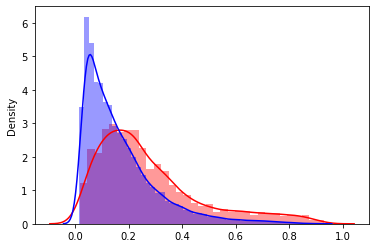

In [47]:

all_delayed = []
all_in_time = []
for idx, val in enumerate(test_y.to_numpy()):
    if val[0]:
        all_delayed.append(prediction_prob[:,1][idx])
    else:
        all_in_time.append(prediction_prob[:,1][idx])
        
sns.distplot(all_delayed, hist=True, label='Signal', color='red')
sns.distplot(all_in_time, hist=True, label='Signal', color='blue')

In [64]:
prediction_prob = clf.predict_proba(test_X)

cases = []
for probability in np.linspace(0.5,1,500,endpoint=False):
    print("Probability {}".format(probability))
    prediction = [ 1 if i > probability else 0 for i in prediction_prob[:,1]]
    tn, fp, fn, tp = confusion_matrix(test_y, prediction).ravel()
    score = accuracy_score(test_y, prediction)
    cases.append([score, tn, fp, fn, tp, probability, precision_recall_fscore_support(test_y, prediction, average='binary')])

    report = classification_report(test_y, prediction)    
    print("Confusion Matrix")
    print("TN: {}, FP: {}, FN: {}, TP: {}\n".format(tn, fp, fn, tp))
    print("Score: {}".format(score))
    print("Report: \n", report)
    
    print("------------------------------------------------------------\n")

Probability 0.5
Confusion Matrix
TN: 16035, FP: 587, FN: 3335, TP: 505

Score: 0.8083276317075555
Report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     16622
           1       0.46      0.13      0.20      3840

    accuracy                           0.81     20462
   macro avg       0.65      0.55      0.55     20462
weighted avg       0.76      0.81      0.76     20462

------------------------------------------------------------

Probability 0.501
Confusion Matrix
TN: 16037, FP: 585, FN: 3336, TP: 504

Score: 0.8083765027856514
Report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     16622
           1       0.46      0.13      0.20      3840

    accuracy                           0.81     20462
   macro avg       0.65      0.55      0.55     20462
weighted avg       0.76      0.81      0.76     20462

------------------------------------------------------------

Prob

Confusion Matrix
TN: 16092, FP: 530, FN: 3376, TP: 464

Score: 0.8091095689570912
Report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89     16622
           1       0.47      0.12      0.19      3840

    accuracy                           0.81     20462
   macro avg       0.65      0.54      0.54     20462
weighted avg       0.76      0.81      0.76     20462

------------------------------------------------------------

Probability 0.518
Confusion Matrix
TN: 16095, FP: 527, FN: 3377, TP: 463

Score: 0.8092073111132831
Report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89     16622
           1       0.47      0.12      0.19      3840

    accuracy                           0.81     20462
   macro avg       0.65      0.54      0.54     20462
weighted avg       0.76      0.81      0.76     20462

------------------------------------------------------------

Probability 0.519
Co

Confusion Matrix
TN: 16163, FP: 459, FN: 3398, TP: 442

Score: 0.8115042517837944
Report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89     16622
           1       0.49      0.12      0.19      3840

    accuracy                           0.81     20462
   macro avg       0.66      0.54      0.54     20462
weighted avg       0.76      0.81      0.76     20462

------------------------------------------------------------

Probability 0.537
Confusion Matrix
TN: 16164, FP: 458, FN: 3399, TP: 441

Score: 0.8115042517837944
Report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89     16622
           1       0.49      0.11      0.19      3840

    accuracy                           0.81     20462
   macro avg       0.66      0.54      0.54     20462
weighted avg       0.76      0.81      0.76     20462

------------------------------------------------------------

Probability 0.538
Co

Confusion Matrix
TN: 16212, FP: 410, FN: 3423, TP: 417

Score: 0.8126771576580979
Report: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.89     16622
           1       0.50      0.11      0.18      3840

    accuracy                           0.81     20462
   macro avg       0.66      0.54      0.54     20462
weighted avg       0.77      0.81      0.76     20462

------------------------------------------------------------

Probability 0.555
Confusion Matrix
TN: 16216, FP: 406, FN: 3425, TP: 415

Score: 0.8127748998142899
Report: 
               precision    recall  f1-score   support

           0       0.83      0.98      0.89     16622
           1       0.51      0.11      0.18      3840

    accuracy                           0.81     20462
   macro avg       0.67      0.54      0.54     20462
weighted avg       0.77      0.81      0.76     20462

------------------------------------------------------------

Probability 0.556
Co

Confusion Matrix
TN: 16257, FP: 365, FN: 3455, TP: 385

Score: 0.8133124816733457
Report: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     16622
           1       0.51      0.10      0.17      3840

    accuracy                           0.81     20462
   macro avg       0.67      0.54      0.53     20462
weighted avg       0.77      0.81      0.76     20462

------------------------------------------------------------

Probability 0.5720000000000001
Confusion Matrix
TN: 16258, FP: 364, FN: 3456, TP: 384

Score: 0.8133124816733457
Report: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89     16622
           1       0.51      0.10      0.17      3840

    accuracy                           0.81     20462
   macro avg       0.67      0.54      0.53     20462
weighted avg       0.77      0.81      0.76     20462

------------------------------------------------------------

Probabi

Confusion Matrix
TN: 16293, FP: 329, FN: 3476, TP: 364

Score: 0.8140455478447854
Report: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.90     16622
           1       0.53      0.09      0.16      3840

    accuracy                           0.81     20462
   macro avg       0.67      0.54      0.53     20462
weighted avg       0.77      0.81      0.76     20462

------------------------------------------------------------

Probability 0.59
Confusion Matrix
TN: 16296, FP: 326, FN: 3480, TP: 360

Score: 0.8139966767666895
Report: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.90     16622
           1       0.52      0.09      0.16      3840

    accuracy                           0.81     20462
   macro avg       0.67      0.54      0.53     20462
weighted avg       0.77      0.81      0.76     20462

------------------------------------------------------------

Probability 0.591
Con

Confusion Matrix
TN: 16336, FP: 286, FN: 3506, TP: 334

Score: 0.8146808718600332
Report: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.90     16622
           1       0.54      0.09      0.15      3840

    accuracy                           0.81     20462
   macro avg       0.68      0.53      0.52     20462
weighted avg       0.77      0.81      0.76     20462

------------------------------------------------------------

Probability 0.608
Confusion Matrix
TN: 16338, FP: 284, FN: 3507, TP: 333

Score: 0.8147297429381292
Report: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.90     16622
           1       0.54      0.09      0.15      3840

    accuracy                           0.81     20462
   macro avg       0.68      0.53      0.52     20462
weighted avg       0.77      0.81      0.76     20462

------------------------------------------------------------

Probability 0.609
Co

Confusion Matrix
TN: 16373, FP: 249, FN: 3536, TP: 304

Score: 0.8150229694067052
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.55      0.08      0.14      3840

    accuracy                           0.82     20462
   macro avg       0.69      0.53      0.52     20462
weighted avg       0.77      0.82      0.75     20462

------------------------------------------------------------

Probability 0.627
Confusion Matrix
TN: 16375, FP: 247, FN: 3537, TP: 303

Score: 0.8150718404848011
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.55      0.08      0.14      3840

    accuracy                           0.82     20462
   macro avg       0.69      0.53      0.52     20462
weighted avg       0.77      0.82      0.75     20462

------------------------------------------------------------

Probability 0.628
Co

Confusion Matrix
TN: 16396, FP: 226, FN: 3564, TP: 276

Score: 0.8147786140162252
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.55      0.07      0.13      3840

    accuracy                           0.81     20462
   macro avg       0.69      0.53      0.51     20462
weighted avg       0.77      0.81      0.75     20462

------------------------------------------------------------

Probability 0.644
Confusion Matrix
TN: 16397, FP: 225, FN: 3564, TP: 276

Score: 0.8148274850943212
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.55      0.07      0.13      3840

    accuracy                           0.81     20462
   macro avg       0.69      0.53      0.51     20462
weighted avg       0.77      0.81      0.75     20462

------------------------------------------------------------

Probability 0.645
Co

Confusion Matrix
TN: 16432, FP: 190, FN: 3588, TP: 252

Score: 0.815365066953377
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.57      0.07      0.12      3840

    accuracy                           0.82     20462
   macro avg       0.70      0.53      0.51     20462
weighted avg       0.77      0.82      0.75     20462

------------------------------------------------------------

Probability 0.663
Confusion Matrix
TN: 16435, FP: 187, FN: 3590, TP: 250

Score: 0.815413938031473
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.57      0.07      0.12      3840

    accuracy                           0.82     20462
   macro avg       0.70      0.53      0.51     20462
weighted avg       0.77      0.82      0.75     20462

------------------------------------------------------------

Probability 0.664
Conf

Confusion Matrix
TN: 16457, FP: 165, FN: 3606, TP: 234

Score: 0.8157071645000489
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.59      0.06      0.11      3840

    accuracy                           0.82     20462
   macro avg       0.70      0.53      0.50     20462
weighted avg       0.78      0.82      0.75     20462

------------------------------------------------------------

Probability 0.6799999999999999
Confusion Matrix
TN: 16457, FP: 165, FN: 3606, TP: 234

Score: 0.8157071645000489
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.59      0.06      0.11      3840

    accuracy                           0.82     20462
   macro avg       0.70      0.53      0.50     20462
weighted avg       0.78      0.82      0.75     20462

------------------------------------------------------------

Probabi

Confusion Matrix
TN: 16483, FP: 139, FN: 3622, TP: 218

Score: 0.8161958752810087
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.61      0.06      0.10      3840

    accuracy                           0.82     20462
   macro avg       0.72      0.52      0.50     20462
weighted avg       0.78      0.82      0.75     20462

------------------------------------------------------------

Probability 0.6970000000000001
Confusion Matrix
TN: 16483, FP: 139, FN: 3623, TP: 217

Score: 0.8161470042029128
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.61      0.06      0.10      3840

    accuracy                           0.82     20462
   macro avg       0.71      0.52      0.50     20462
weighted avg       0.78      0.82      0.75     20462

------------------------------------------------------------

Probabi

Confusion Matrix
TN: 16513, FP: 109, FN: 3651, TP: 189

Score: 0.8162447463591047
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.63      0.05      0.09      3840

    accuracy                           0.82     20462
   macro avg       0.73      0.52      0.49     20462
weighted avg       0.78      0.82      0.75     20462

------------------------------------------------------------

Probability 0.714
Confusion Matrix
TN: 16513, FP: 109, FN: 3651, TP: 189

Score: 0.8162447463591047
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.63      0.05      0.09      3840

    accuracy                           0.82     20462
   macro avg       0.73      0.52      0.49     20462
weighted avg       0.78      0.82      0.75     20462

------------------------------------------------------------

Probability 0.715
Co

Confusion Matrix
TN: 16531, FP: 91, FN: 3670, TP: 170

Score: 0.8161958752810087
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.65      0.04      0.08      3840

    accuracy                           0.82     20462
   macro avg       0.73      0.52      0.49     20462
weighted avg       0.79      0.82      0.74     20462

------------------------------------------------------------

Probability 0.732
Confusion Matrix
TN: 16531, FP: 91, FN: 3673, TP: 167

Score: 0.8160492620467208
Report: 
               precision    recall  f1-score   support

           0       0.82      0.99      0.90     16622
           1       0.65      0.04      0.08      3840

    accuracy                           0.82     20462
   macro avg       0.73      0.52      0.49     20462
weighted avg       0.79      0.82      0.74     20462

------------------------------------------------------------

Probability 0.733
Conf

Confusion Matrix
TN: 16553, FP: 69, FN: 3689, TP: 151

Score: 0.8163424885152967
Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16622
           1       0.69      0.04      0.07      3840

    accuracy                           0.82     20462
   macro avg       0.75      0.52      0.49     20462
weighted avg       0.79      0.82      0.74     20462

------------------------------------------------------------

Probability 0.75
Confusion Matrix
TN: 16553, FP: 69, FN: 3690, TP: 150

Score: 0.8162936174372006
Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16622
           1       0.68      0.04      0.07      3840

    accuracy                           0.82     20462
   macro avg       0.75      0.52      0.49     20462
weighted avg       0.79      0.82      0.74     20462

------------------------------------------------------------

Probability 0.751
Confu

Confusion Matrix
TN: 16568, FP: 54, FN: 3711, TP: 129

Score: 0.8160003909686248
Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16622
           1       0.70      0.03      0.06      3840

    accuracy                           0.82     20462
   macro avg       0.76      0.52      0.48     20462
weighted avg       0.80      0.82      0.74     20462

------------------------------------------------------------

Probability 0.768
Confusion Matrix
TN: 16569, FP: 53, FN: 3711, TP: 129

Score: 0.8160492620467208
Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16622
           1       0.71      0.03      0.06      3840

    accuracy                           0.82     20462
   macro avg       0.76      0.52      0.48     20462
weighted avg       0.80      0.82      0.74     20462

------------------------------------------------------------

Probability 0.769
Conf

Confusion Matrix
TN: 16577, FP: 45, FN: 3730, TP: 110

Score: 0.815511680187665
Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16622
           1       0.71      0.03      0.06      3840

    accuracy                           0.82     20462
   macro avg       0.76      0.51      0.48     20462
weighted avg       0.80      0.82      0.74     20462

------------------------------------------------------------

Probability 0.786
Confusion Matrix
TN: 16578, FP: 44, FN: 3731, TP: 109

Score: 0.815511680187665
Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16622
           1       0.71      0.03      0.05      3840

    accuracy                           0.82     20462
   macro avg       0.76      0.51      0.48     20462
weighted avg       0.80      0.82      0.74     20462

------------------------------------------------------------

Probability 0.787
Confus

Confusion Matrix
TN: 16593, FP: 29, FN: 3747, TP: 93

Score: 0.8154628091095689
Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16622
           1       0.76      0.02      0.05      3840

    accuracy                           0.82     20462
   macro avg       0.79      0.51      0.47     20462
weighted avg       0.81      0.82      0.74     20462

------------------------------------------------------------

Probability 0.8029999999999999
Confusion Matrix
TN: 16593, FP: 29, FN: 3749, TP: 91

Score: 0.815365066953377
Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16622
           1       0.76      0.02      0.05      3840

    accuracy                           0.82     20462
   macro avg       0.79      0.51      0.47     20462
weighted avg       0.80      0.82      0.74     20462

------------------------------------------------------------

Probability 

Confusion Matrix
TN: 16602, FP: 20, FN: 3765, TP: 75

Score: 0.8150229694067052
Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16622
           1       0.79      0.02      0.04      3840

    accuracy                           0.82     20462
   macro avg       0.80      0.51      0.47     20462
weighted avg       0.81      0.82      0.74     20462

------------------------------------------------------------

Probability 0.821
Confusion Matrix
TN: 16603, FP: 19, FN: 3768, TP: 72

Score: 0.8149252272505132
Report: 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90     16622
           1       0.79      0.02      0.04      3840

    accuracy                           0.81     20462
   macro avg       0.80      0.51      0.47     20462
weighted avg       0.81      0.81      0.74     20462

------------------------------------------------------------

Probability 0.8220000000

Confusion Matrix
TN: 16611, FP: 11, FN: 3784, TP: 56

Score: 0.8145342586257452
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.84      0.01      0.03      3840

    accuracy                           0.81     20462
   macro avg       0.83      0.51      0.46     20462
weighted avg       0.82      0.81      0.73     20462

------------------------------------------------------------

Probability 0.8380000000000001
Confusion Matrix
TN: 16611, FP: 11, FN: 3785, TP: 55

Score: 0.8144853875476493
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.83      0.01      0.03      3840

    accuracy                           0.81     20462
   macro avg       0.82      0.51      0.46     20462
weighted avg       0.82      0.81      0.73     20462

------------------------------------------------------------

Probability

Confusion Matrix
TN: 16613, FP: 9, FN: 3797, TP: 43

Score: 0.8139966767666895
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.83      0.01      0.02      3840

    accuracy                           0.81     20462
   macro avg       0.82      0.51      0.46     20462
weighted avg       0.82      0.81      0.73     20462

------------------------------------------------------------

Probability 0.855
Confusion Matrix
TN: 16613, FP: 9, FN: 3797, TP: 43

Score: 0.8139966767666895
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.83      0.01      0.02      3840

    accuracy                           0.81     20462
   macro avg       0.82      0.51      0.46     20462
weighted avg       0.82      0.81      0.73     20462

------------------------------------------------------------

Probability 0.856
Confusio

Confusion Matrix
TN: 16617, FP: 5, FN: 3815, TP: 25

Score: 0.8133124816733457
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.83      0.01      0.01      3840

    accuracy                           0.81     20462
   macro avg       0.82      0.50      0.45     20462
weighted avg       0.82      0.81      0.73     20462

------------------------------------------------------------

Probability 0.873
Confusion Matrix
TN: 16617, FP: 5, FN: 3815, TP: 25

Score: 0.8133124816733457
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.83      0.01      0.01      3840

    accuracy                           0.81     20462
   macro avg       0.82      0.50      0.45     20462
weighted avg       0.82      0.81      0.73     20462

------------------------------------------------------------

Probability 0.874
Confusio

Confusion Matrix
TN: 16619, FP: 3, FN: 3823, TP: 17

Score: 0.8130192552047698
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.85      0.00      0.01      3840

    accuracy                           0.81     20462
   macro avg       0.83      0.50      0.45     20462
weighted avg       0.82      0.81      0.73     20462

------------------------------------------------------------

Probability 0.891
Confusion Matrix
TN: 16619, FP: 3, FN: 3823, TP: 17

Score: 0.8130192552047698
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.85      0.00      0.01      3840

    accuracy                           0.81     20462
   macro avg       0.83      0.50      0.45     20462
weighted avg       0.82      0.81      0.73     20462

------------------------------------------------------------

Probability 0.892
Confusio

Confusion Matrix
TN: 16622, FP: 0, FN: 3833, TP: 7

Score: 0.8126771576580979
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       1.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.91      0.50      0.45     20462
weighted avg       0.85      0.81      0.73     20462

------------------------------------------------------------

Probability 0.909
Confusion Matrix
TN: 16622, FP: 0, FN: 3834, TP: 6

Score: 0.812628286580002
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       1.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.91      0.50      0.45     20462
weighted avg       0.85      0.81      0.73     20462

------------------------------------------------------------

Probability 0.91
Confusion Ma

Confusion Matrix
TN: 16622, FP: 0, FN: 3839, TP: 1

Score: 0.812383931189522
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       1.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.91      0.50      0.45     20462
weighted avg       0.85      0.81      0.73     20462

------------------------------------------------------------

Probability 0.927
Confusion Matrix
TN: 16622, FP: 0, FN: 3839, TP: 1

Score: 0.812383931189522
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       1.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.91      0.50      0.45     20462
weighted avg       0.85      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9279999999999999

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.933
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.93399999999999

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.935
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.93599999999999

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.937
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.938


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9390000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9410000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9430000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9450000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9470000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9490000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9510000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9530000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9550000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9570000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9590000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9610000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9630000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9650000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9670000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9690000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9710000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9730000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9750000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9770000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9790000000000001
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.9

C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.981
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.982


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.983
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.984


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.985
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.986


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.987
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.988


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.989
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.99


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.991
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.992


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.993
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.994


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.995
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.996


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.997
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.998


C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: U

Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------

Probability 0.999
Confusion Matrix
TN: 16622, FP: 0, FN: 3840, TP: 0

Score: 0.8123350601114261
Report: 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     16622
           1       0.00      0.00      0.00      3840

    accuracy                           0.81     20462
   macro avg       0.41      0.50      0.45     20462
weighted avg       0.66      0.81      0.73     20462

------------------------------------------------------------



C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Felipe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Undefined

In [70]:
all_metrics = sorted(cases, key = lambda arr: arr[0])
best_accuracy_threshold = all_metrics[-1]


[0.8157071645000489, 16574, 48, 3723, 117, 0.78, (0.7090909090909091, 0.03046875, 0.05842696629213483, None)]


<h2>Fifth challenge</h2>


<p>Print a list of importance values of variables in order.</p>

In [71]:
importance_values = dict(zip(list(train_X), clf.best_estimator_.feature_importances_))
print(list(filter(lambda x: x[1] > 0, list(importance_values.items()))))


[('DIA', 0.006730389), ('MES', 0.0052374173), ('fechats', 0.008998557), ('TIPOVUELO_I', 0.10692002), ('period_day_afternoon', 0.009033368), ('period_day_morning', 0.015673814), ('period_day_night', 0.011512798), ('SIGLADES_Antofagasta', 0.0057034413), ('SIGLADES_Arica', 0.0065722954), ('SIGLADES_Asuncion', 0.016945815), ('SIGLADES_Atlanta', 0.02669555), ('SIGLADES_Auckland N.Z.', 0.026965259), ('SIGLADES_Balmaceda', 0.008448817), ('SIGLADES_Bogota', 0.014067373), ('SIGLADES_Buenos Aires', 0.012005677), ('SIGLADES_Calama', 0.0059460565), ('SIGLADES_Cancun', 0.007338918), ('SIGLADES_Castro (Chiloe)', 0.0057417145), ('SIGLADES_Ciudad de Mexico', 0.023366094), ('SIGLADES_Ciudad de Panama', 0.16539192), ('SIGLADES_Concepcion', 0.0053758947), ('SIGLADES_Copiapo', 0.0054776026), ('SIGLADES_Cordoba', 0.023371689), ('SIGLADES_Dallas', 0.02314727), ('SIGLADES_Florianapolis', 0.006824179), ('SIGLADES_Guayaquil', 0.011915778), ('SIGLADES_Houston', 0.033694502), ('SIGLADES_Iquique', 0.0071046744), 

<p> To try to find the best model, we use GridSearchCV A brute force technique that test a model with differents combinations of params using cross validation and some metric to decide wich combination is better. We use Support Vector Machine(SVM) and Boosted Decision Trees(BDT) in first instance because both are techniques with good performance in differents scopes of Data Science and easy to implement. Neuronal Networks was tested too, in another file, but the performance was equal to the SVM, then was descarted because the complexity of the model.</p> 
<p>To improve the performance of the model, in the last case of BDT, we move the threshold of probability that decide if a flight will be delayed or not, to try to improve the accuracy and the predictions, as we can see, for example in the first experiment with BDT and SVM, almost all the events was classified as not delayed flights, but with an accuracy of 0.8123350601114261 (because all the not delayed flights was correctly classified), moving the threshold and incresing the complexity of the model with the amount of parallel trees among others, we increasy the True Positive, delayed flights classified correctly. When we move the thresshold, we discard some TP to reduce even more the False Positive (not delayed flights classified as delayed flights) and creating a classifier with a better performance.</p>
<p>The most influencial variables are DIA, MES and Fecha-I (Converted to a timestamps), others important variables are the variables that was created to encode the categorical data, one of this vars is if the flight is International, the same that we seen in the charts during the challenge 3</p>
<p>To improve the model or find another model is required more time, to try to find another techniques that could improve the performance, or maybe another set of parameters values for Decision Trees and SVM(Take too long for a couple of values of params, so need more time to improve). In addition, could be interesting try to change the diemtnionality with some techniques as PCA, or use autoencoders and then try to clasify. In addition, is a good idea try to create an architecture of Neuronal Network that works with more accuracy on the datasets and try differents type of Neuronal Networks as Feed Forward or Recurrent.</p>
<p>As final conclusion, the data is not easy to separate in two class as we can see with the performance in the most of the cases, so, is difficult to decide if the flight will be delayed, and is something </p>